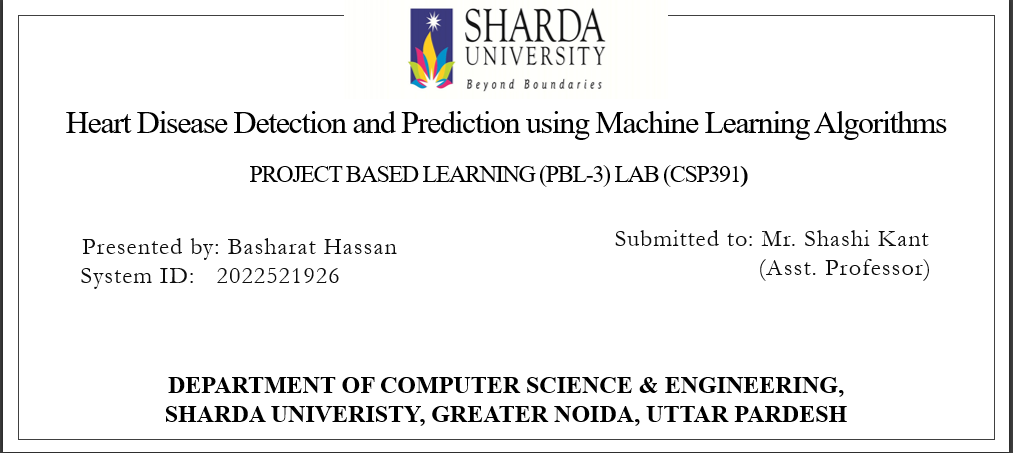

# Index
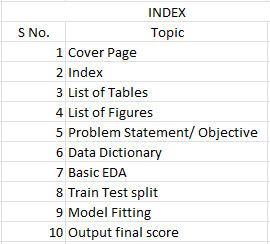

# List of Tables
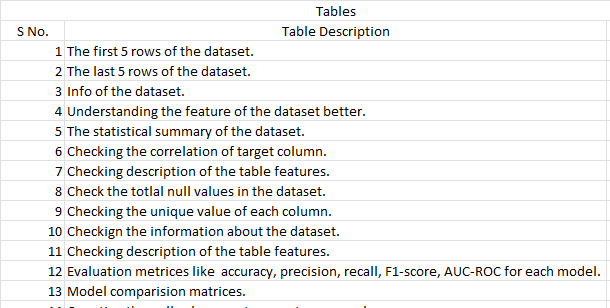

# List of Figures
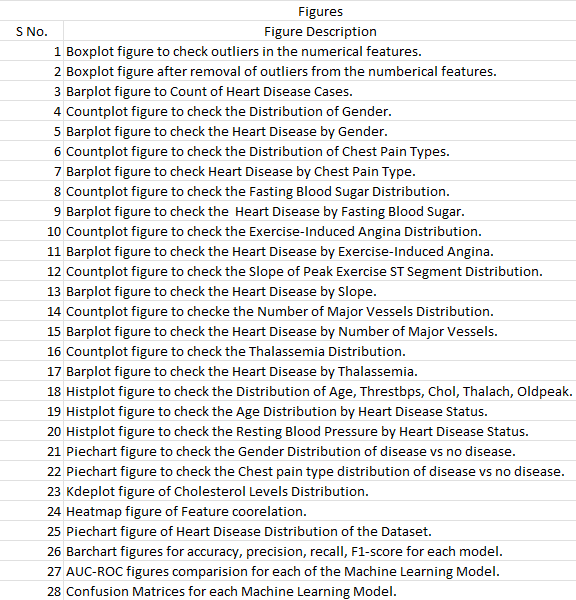

# Problem Statement
The increasing prevalence of heart diseases, a leading cause of mortality globally, necessitates effective measures for early detection and prevention. Despite significant advancements in medical science, many individuals remain deprived of timely diagnoses due to economic limitations, lack of awareness, or inadequate access to healthcare services. This disparity underlines the critical need for scalable and affordable diagnostic solutions.
Given a dataset comprising features such as age, gender, blood pressure, cholesterol levels, blood sugar levels, and other relevant medical parameters, this study seeks to address the challenge of predicting heart disease risk. The problem lies in accurately analyzing these features to identify high-risk individuals and develop a machine learning-based predictive model. Such a solution would enable proactive interventions, reduce mortality rates, and make early heart disease detection accessible to underserved populations.

# Objective
The primary aim of this study is to leverage machine learning algorithms to develop a predictive model for heart disease. Specifically, the objectives include:

* Exploratory Data Analysis (EDA): Analyze and visualize the dataset to identify key patterns and trends.
* Feature Engineering: Select and preprocess the most relevant features that influence heart disease.
* Model Development: Implement various machine learning algorithms to predict heart disease with high accuracy.
* Performance Evaluation: Compare model performances using metrics such as accuracy, precision, recall, and F1-score to identify the most effective algorithm.
* Insights and Recommendations: Provide actionable insights to healthcare professionals and individuals for better risk assessment and prevention strategies.

# Data Description
The dataset used in this project contains various features related to heart disease prediction. It comprises medical attributes and personal details of individuals, which will be used to predict the likelihood of heart disease. The detailed data dictionary is provided below.

* age: Age of the individual (in years)
* gender: Gender of the individual (male or female)
* chest_pain_type: Type of chest pain (e.g., typical angina, atypical angina, non-anginal pain, asymptomatic)
* resting_blood_pressure: Resting blood pressure (in mm Hg)
* serum_cholesterol: Serum cholesterol level (in mg/dl)
* fasting_blood_sugar: Fasting blood sugar (1 if greater than 120 mg/dl, 0 if less than or equal to 120 mg/dl)
* resting_ecg: Resting electrocardiographic results (values range from 0 to 2 indicating different types of results)
* max_heart_rate_achieved: Maximum heart rate achieved during stress testing (in beats per minute)
* exercise_induced_angina: Exercise-induced angina (1 if present, 0 if not)
* oldpeak: Depression induced by exercise relative to rest (a measure of ST depression)
* slope_of_peak_exercise_st_segment: The slope of the peak exercise ST segment (e.g., up, flat, down)
* number_of_vessels_fluro: Number of vessels colored by fluoroscopy (ranges from 0 to 3)
* thal: Thalassemia type (1 = normal, 2 = fixed defect, 3 = reversable defect)
* target: Target variable indicating whether the individual has heart disease (1 = present, 0 = absent)


# Importing the necessary Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [126]:
df = pd.read_csv('heart.csv')

# Basic Steps

## 1 - First Five Rows

In [127]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

                                Table No. 1

## Observations
* All the entries in the dataset for each column is numeric though we will confirm later.
* There are no Not Given entry in any column, we will check later.

## 2 - Last Five Rows

In [128]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

                                Table No. 2

## Observation
* Here also there are all entries for each column numeric and no Not Given entries are seen.

## 3 -  Shape of dataset

In [129]:
df.shape

(303, 14)

## Observations
* There are 303 rows and 14 columns in the dataset.

## 4 - Check datatypes of each feature

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


            Table No. 3

## Observations
* There are no null entries in any column.
* All entries in the dataset for each feature is Numeric.


## 5 - Better understand dataset

In [131]:
# Understanding the dataset better in human readible terms
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


                                            Table No.4

## Observations
* Here we got to understand and read the features of the dataset in human readible language. 

## 6 - Statistical Summary of Target Feature

In [188]:
df["target"].describe()

count    302.000000
mean       0.543046
std        0.498970
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

        Table No. 5

## 7 -  Check for unique Values for Target Feature

In [133]:
df["target"].unique()

array([1, 0], dtype=int64)

## 8 - Check for Coorelation of Target Feature with Every other Feature

In [134]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


        Table No. 6

* This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## 9 -  Statistical summary

In [136]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

                                                Table No. 7

## Observations
* Here mean age in the dataset is 54.36 years.
* Sex is represented as 0/1 as a Numeric value rather then a M/F as a Categorical value so presents the the abnormal statistical summary, but we will work with Numeric datatyps. Same goes for rest of categorical features that should be Categorical.

## 10 - Check for null values

In [137]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Table No. 8

## Observations
* There are no null entries in any column of the any feature of the dataset.

## 11 -  Check for duplicate rows

In [138]:
df.duplicated().sum() 

1

## Observations
* There is only one duplicated row in the dataset we will fix it in cleaning process.

## 12 - Check for anomalies or wrong entries

In [139]:
# Loop over each column in the DataFrame
for column in df.columns:
    print(f"Unique values in '{column}': {df[column].unique()}\n")


Unique values in 'age': [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

Unique values in 'sex': [1 0]

Unique values in 'cp': [3 2 1 0]

Unique values in 'trestbps': [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

Unique values in 'chol': [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 1

                                Table No.9

## Observations
* For each column of the dataset which is Numeric there are no wrong entries or anomalies present.

## 13 - Check for outliers and their authenticity

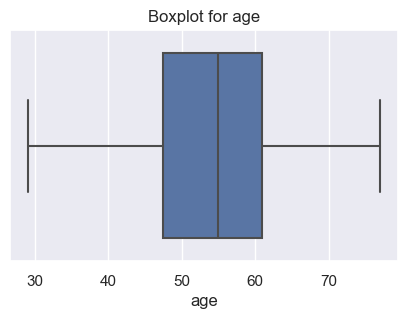

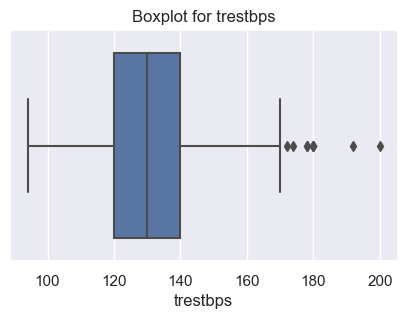

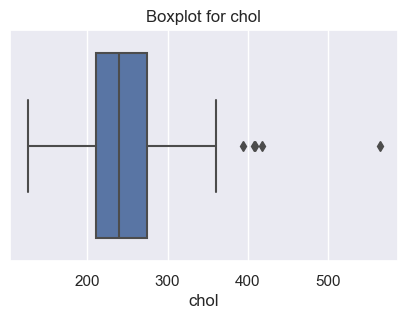

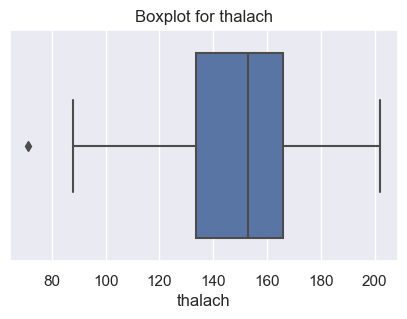

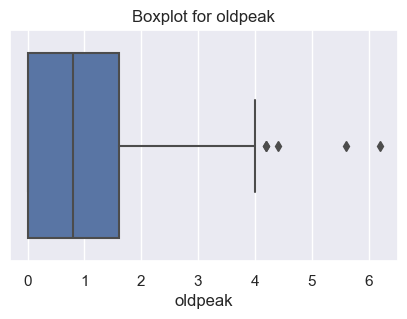

In [140]:
# List of numeric columns to visualize
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Creating boxplots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()


                    Fig No. 1

## Observations
* There are outliers present in trestbps, chol, thalach, oldpeak features of the dataset.
* As these are all Numeric features and outliers are present so we will cap them later using IQR.

# Data Cleaning

## 1 - Correct data types

## Observation
* All the data types for each feature in dataset is Numeric which is good enough for eda and modelling.

## 2 - Duplicated values

In [141]:
# Checking for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Removing duplicates if any exist
df.drop_duplicates(inplace=True)
print("Duplicates removed successfully!")
print(f"Dataset now has {df.shape[0]} rows and {df.shape[1]} columns.")


Number of duplicate rows: 1
Duplicates removed successfully!
Dataset now has 302 rows and 14 columns.


## Observations
* As seen there was one duplicated row in the column.
* The duplicated row was successfully removed from tha dataet.

## 3 - Invalid values / Wrong Entries

## Observation
* As checked earlier all the entries for evey featuer in dataset is Numeric and there are no Not Given entries or invalid or wrong entry in the dataset.

## 4 - Missing values / Null values

In [190]:
df[df.isnull().sum(axis=1)>0]

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []

## Observation
* As seen there are no null values in the dataset.

In [191]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Observation
* There are no mission values in the dataset.

In [192]:
df.isnull().sum()/len(df)*100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

## Observation 
* The Percentage of null values for each column is also 0.

## 3 - Check for outliers and cap them

In [193]:
# Handling outliers using IQR capping
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outlier capping
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outlier capping
    
    # Capping outliers at the bounds
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    # Displaying bounds for each feature
    print(f"{col} - Lower bound: {lower_bound}, Upper bound: {upper_bound}")

print("Outliers have been capped using IQR for all numerical features.")


age - Lower bound: 28.5, Upper bound: 80.5
trestbps - Lower bound: 90.0, Upper bound: 170.0
chol - Lower bound: 115.375, Upper bound: 370.375
thalach - Lower bound: 84.125, Upper bound: 215.125
oldpeak - Lower bound: -2.4000000000000004, Upper bound: 4.0
Outliers have been capped using IQR for all numerical features.


## Observation
* Capped the outliers for each column with outliers using IQR

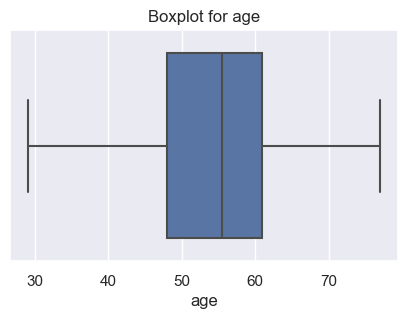

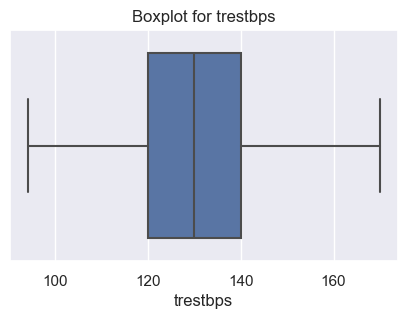

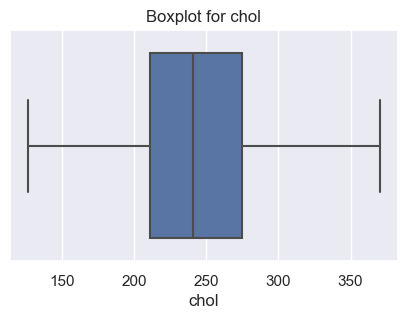

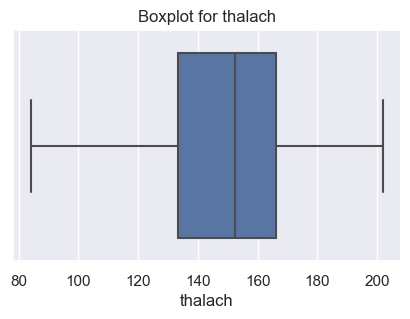

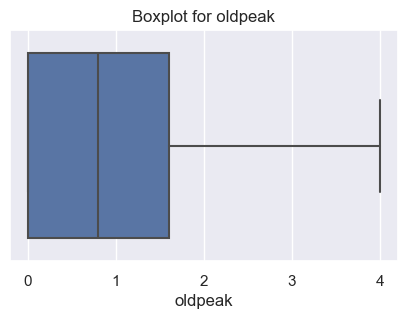

In [143]:
# List of numeric columns to visualize
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Creating boxplots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()


                    Fig No. 2

## Observation
* Here is a visual representation of each numeric column after capping the outliers

## Check for information of the features of the dataset after cleaning

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.4 KB


Table No. 10

## Observations
* There are no null entries in the dataset.
* All the features are of Numeric datatype.

## Check for statistical summary of dataset after cleaning

In [145]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.258278  245.377070    0.149007   
std      9.04797    0.466426    1.032044   16.605232   47.486683    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  170.000000  370.375000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.612997    0.327815    1.027815    1.397351    0.718543   
std      0.526027   22.765983    0.470196    1.110395    0.616274    1.006748   
min      0.000000   84.125000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    4.000000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

                                                    Table No. 11

## Observations
* It is the statiscal summary of the dataset after cleaning and all columns are looking fine for their sattistical summary.

# Exploratory Data Analysis (EDA) 

In [146]:
# Ensure consistent style
sns.set(style="whitegrid")

## 1- Plot the count of each unique value in the 'target' column

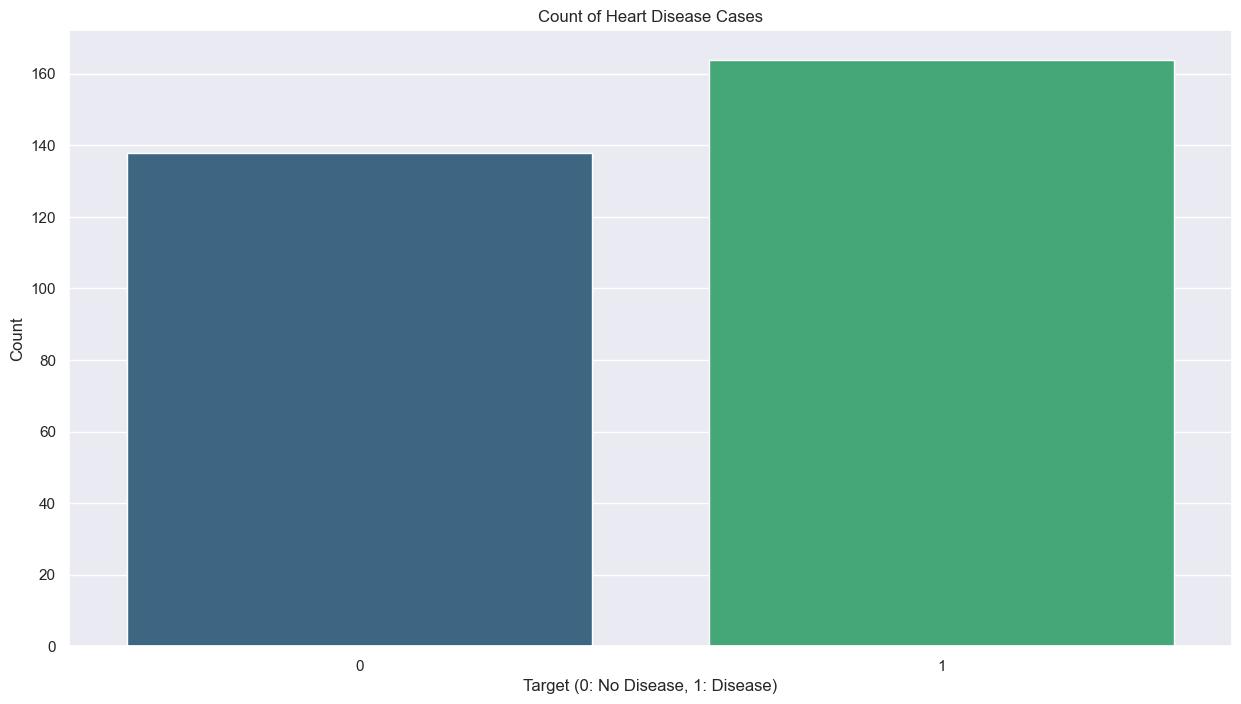

In [198]:
y = df["target"]
sns.countplot(x=y, palette="viridis")
plt.title("Count of Heart Disease Cases")
plt.xlabel("Target (0: No Disease, 1: Disease)")
plt.ylabel("Count")
plt.show()

                                                    Fig No. 3

## Observations
* The plot reveals a higher number of heart disease cases (target = 1) compared to the cases without heart disease (target = 0). This indicates that the dataset contains more instances of individuals diagnosed with heart disease.

* This distribution indicates a moderately balanced dataset, with a slight imbalance favoring heart disease cases (target = 1). While both classes are represented adequately for model training, the imbalance may still need to be addressed during model evaluation to avoid bias. Techniques like oversampling, undersampling, or adjusting class weights could be considered to mitigate the impact of this imbalance.

## 2 -  Get the count of each unique value in 'target' Column

In [148]:
target_temp = df["target"].value_counts()
print(target_temp)

print("Percentage of patients without heart problems: " + str(round(target_temp[0] * 100 / len(df), 2)) + "%")
print("Percentage of patients with heart problems: " + str(round(target_temp[1] * 100 / len(df), 2)) + "%")

target
1    164
0    138
Name: count, dtype: int64
Percentage of patients without heart problems: 45.7%
Percentage of patients with heart problems: 54.3%


## Observations
* The count of unique values in the 'target' column indicates that there are 164 patients with heart problems (target = 1) and 138 patients without heart problems (target = 0). This results in a slight imbalance, with approximately 54.3% of patients having heart disease and 45.7% without it.
* Despite the higher proportion of heart disease cases, the dataset is still relatively balanced, though this imbalance should be considered when training and evaluating the model to prevent any bias toward the majority class. Techniques like resampling or adjusting class weights might be useful to address this imbalance.

## 3 - Plot the Distribution of Gender

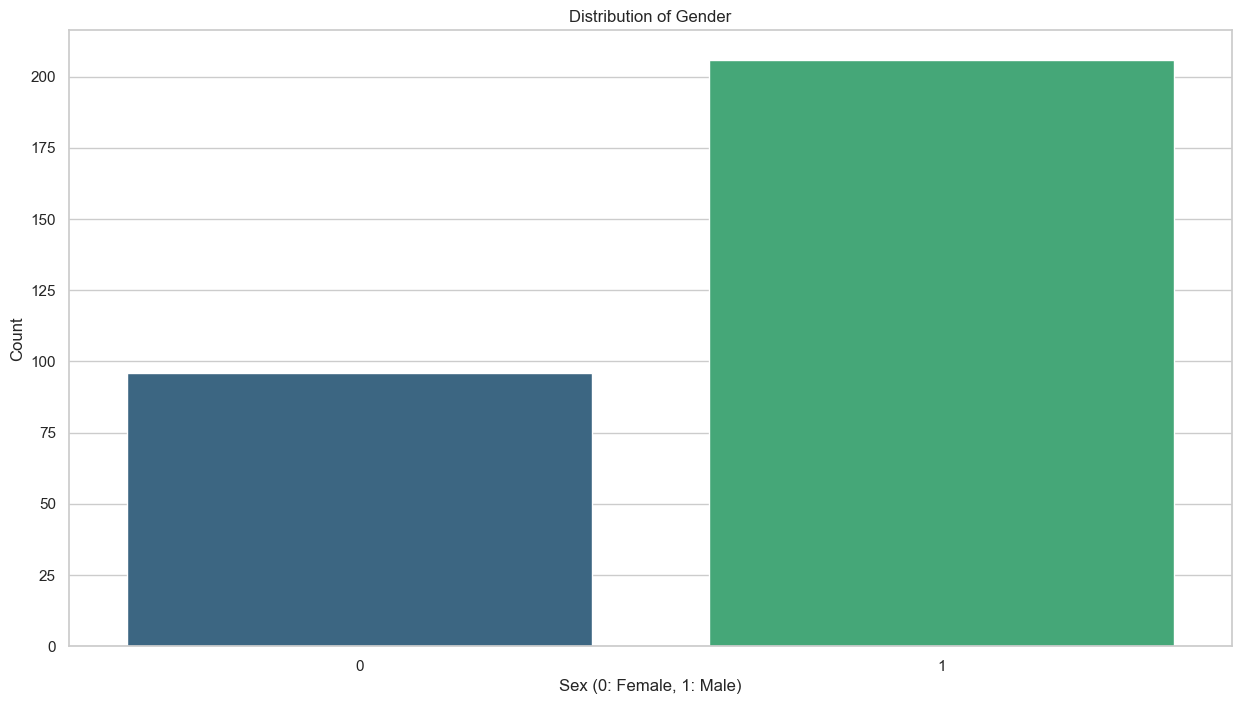

In [149]:
sns.countplot(x="sex", data=df, palette="viridis")
plt.title("Distribution of Gender")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")
plt.show()

                                                    Fig No. 4

## Observations
* The countplot reveals a higher number of male patients compared to female patients in the dataset. This indicates that the dataset has a gender imbalance, with a significantly higher proportion of male individuals. This imbalance should be considered when training models to avoid potential bias toward the majority class.
* Though the imbalance is evident, it’s essential to consider it during model evaluation to avoid biased predictions. Techniques such as resampling, balancing class weights, or other gender-based adjustments could be considered to ensure fairness and robustness in predictions for both genders.

## 4 - Plot the count for Heart Disease by Gender 

C:\Users\basha\AppData\Local\Temp\ipykernel_22716\2632658328.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="sex", y="target", data=df, palette="viridis", ci=None)


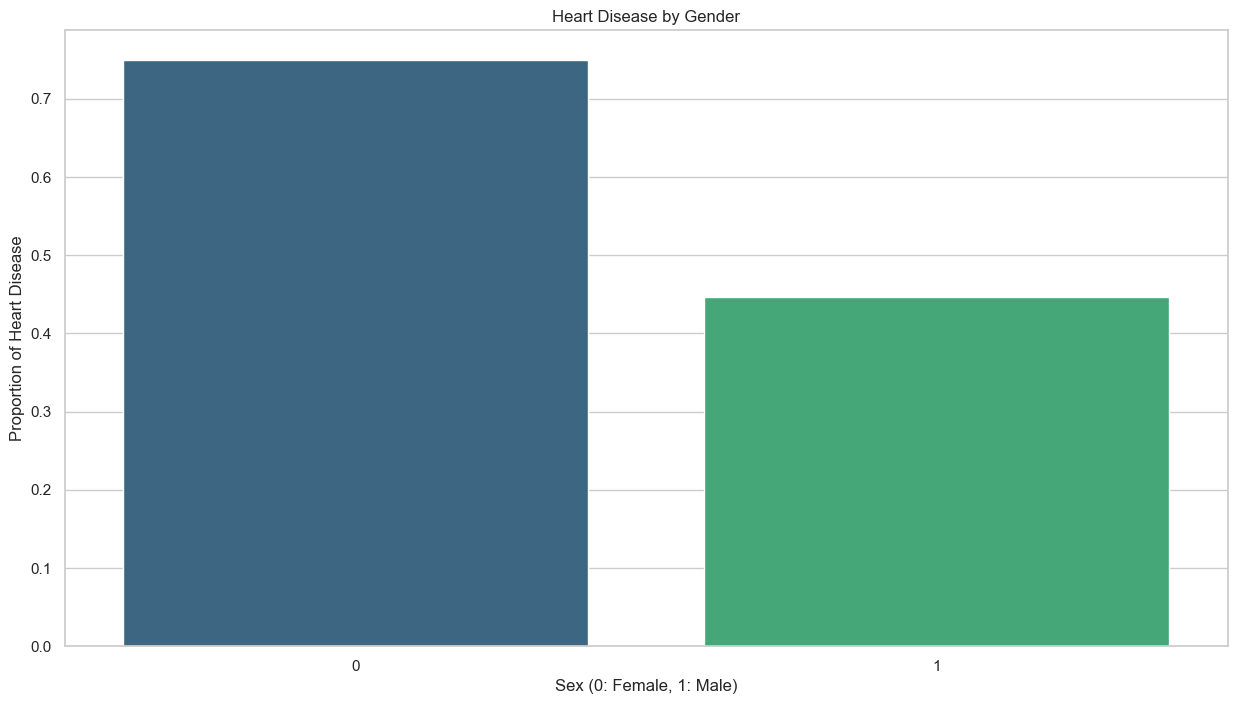

In [150]:
sns.barplot(x="sex", y="target", data=df, palette="viridis", ci=None)
plt.title("Heart Disease by Gender")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Proportion of Heart Disease")
plt.show()


                                                    Fig No. 5

## Observations
* The barplot shows that while there are more male patients in the dataset, the prevalence of heart disease is higher in females. This suggests that, proportionally, females are more likely to have heart disease, which should be taken into account when building and evaluating predictive models for heart disease.
* This insight suggests that gender may play a significant role in predicting heart disease, and the model should account for this distribution. Further analysis could help in understanding the underlying causes or risk factors specific to females, and this information could be leveraged for better prediction and treatment strategies.

## 5 - Plot the Distribution of Chest Pain Types (cp)

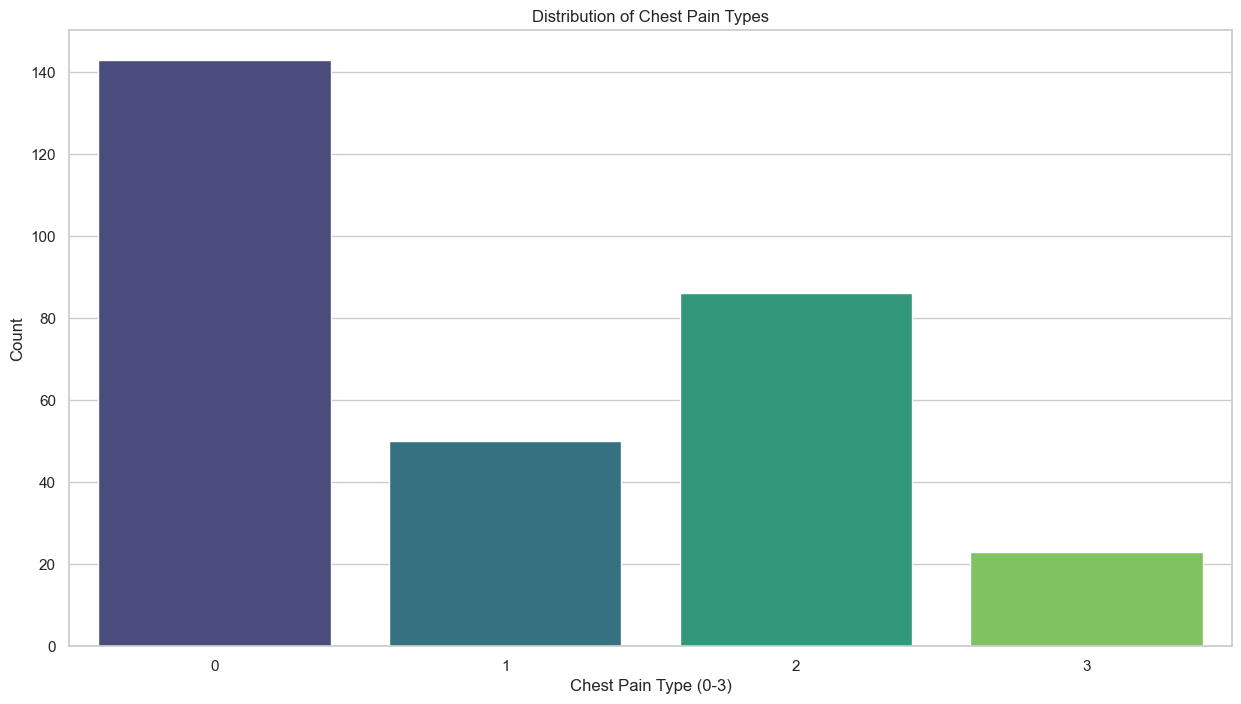

In [151]:
sns.countplot(x="cp", data=df, palette="viridis")
plt.title("Distribution of Chest Pain Types")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Count")
plt.show()

                                                       Fig No. 6

## Observations
* The countplot indicates that typical angina (cp = 0) is the most prevalent chest pain type in the dataset, followed by non-anginal pain (cp = 2), atypical angina (cp = 1), and asymptomatic (cp = 3). This distribution highlights that typical angina is the most common chest pain symptom, which could be a significant factor in predicting heart disease.

* This distribution suggests that typical angina (cp = 0) is the most prevalent type of chest pain among the patients in the dataset, with non-anginal pain (cp = 2) being the second most common. The lower occurrence of atypical angina (cp = 1) and asymptomatic pain (cp = 3) indicates that these types of chest pain may be less frequent or more difficult to diagnose. This information is essential for understanding the different types of chest pain and their potential association with heart disease, which could inform the model's predictions.

## 6 - Plot the Heart Disease by Chest Pain Type (cp)

C:\Users\basha\AppData\Local\Temp\ipykernel_22716\4221465995.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="cp", y="target", data=df, palette="viridis", ci=None)


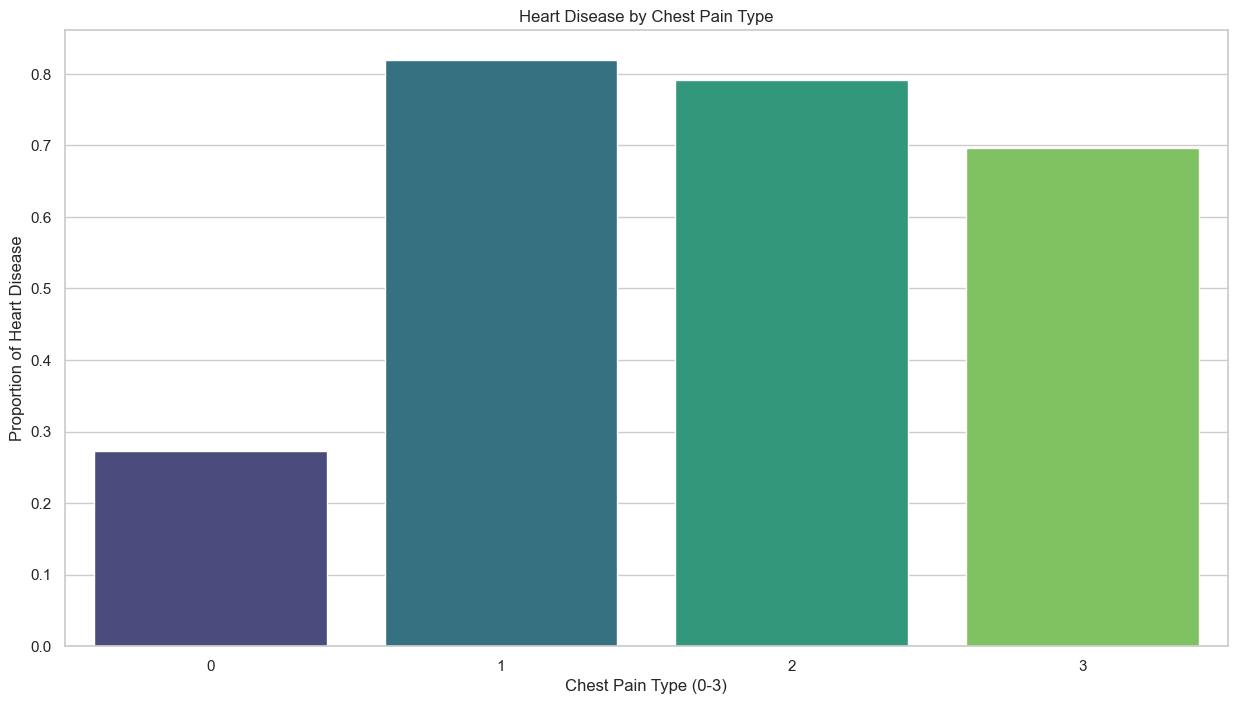

In [152]:
sns.barplot(x="cp", y="target", data=df, palette="viridis", ci=None)
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Proportion of Heart Disease")
plt.show()

                                           Fig No. 7

## Observations
* The barplot reveals that atypical angina (cp = 1) is most strongly associated with heart disease, followed by non-anginal pain (cp = 2) and asymptomatic (cp = 3). Typical angina (cp = 0) shows a relatively lower association with heart disease, which could imply that atypical chest pain may be a stronger predictor of heart disease.
* This distribution suggests that atypical angina (cp = 1) is more strongly associated with the presence of heart disease in this dataset, which could indicate that individuals with atypical chest pain might be at a higher risk for heart problems. The lower association of typical angina (cp = 0) with heart disease may indicate that it is either less frequent or less predictive in this context. This analysis is valuable for model training and interpretation, as chest pain type can be a significant feature for predicting heart disease.

## 7 - Plot the Fasting Blood Sugar Distribution (fbs)

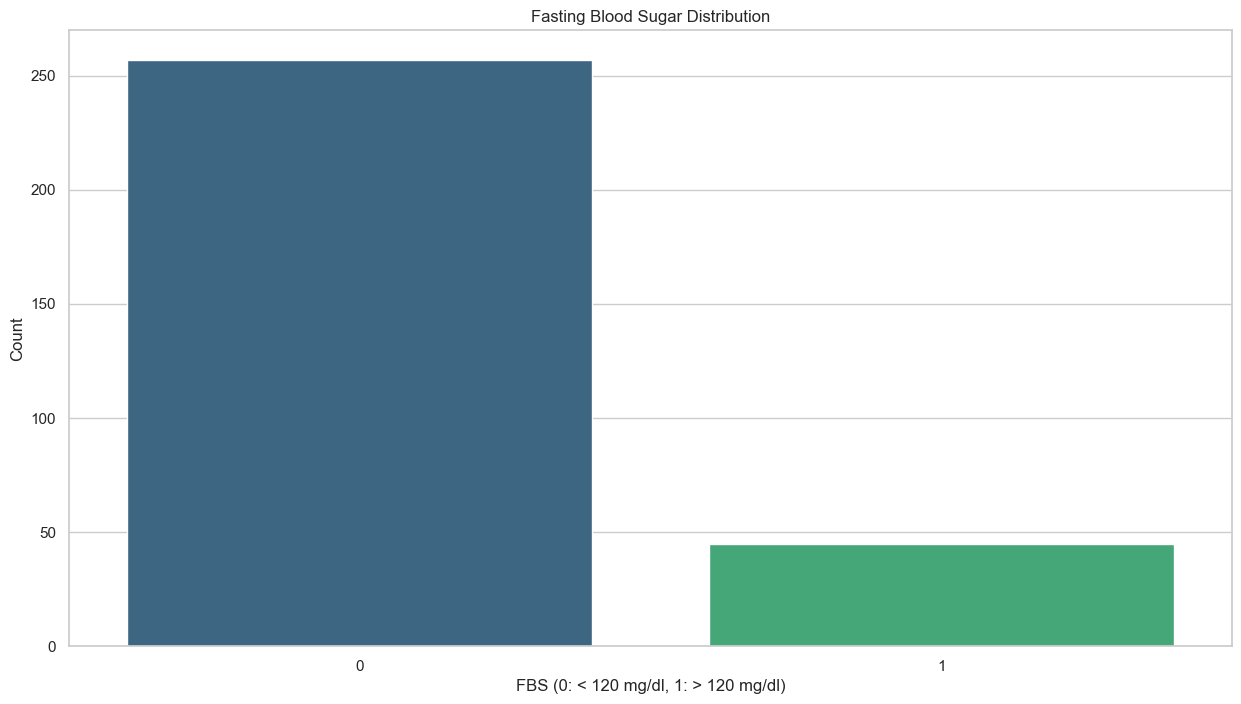

In [153]:
sns.countplot(x="fbs", data=df, palette="viridis")
plt.title("Fasting Blood Sugar Distribution")
plt.xlabel("FBS (0: < 120 mg/dl, 1: > 120 mg/dl)")
plt.ylabel("Count")
plt.show()

                                                        Fig No. 8

## Observations
* The countplot indicates that most individuals have a fasting blood sugar level of less than 120 mg/dl (fbs = 0), while a smaller number of individuals have a fasting blood sugar level greater than or equal to 120 mg/dl (fbs = 1). This suggests that high fasting blood sugar is less prevalent in the dataset but remains an important feature to consider in predicting heart disease.
* This distribution suggests that most of the individuals in the dataset have normal fasting blood sugar levels. The relatively low count of individuals with high fasting blood sugar could imply that diabetes or impaired fasting glucose is less prevalent in this particular dataset. This feature could still provide useful information for predicting heart disease, as elevated blood sugar levels are often linked to an increased risk of cardiovascular problems.

## 8 - Plot the Heart Disease by Fasting Blood Sugar (fbs)

C:\Users\basha\AppData\Local\Temp\ipykernel_22716\2029187768.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="fbs", y="target", data=df, palette="viridis", ci=None)


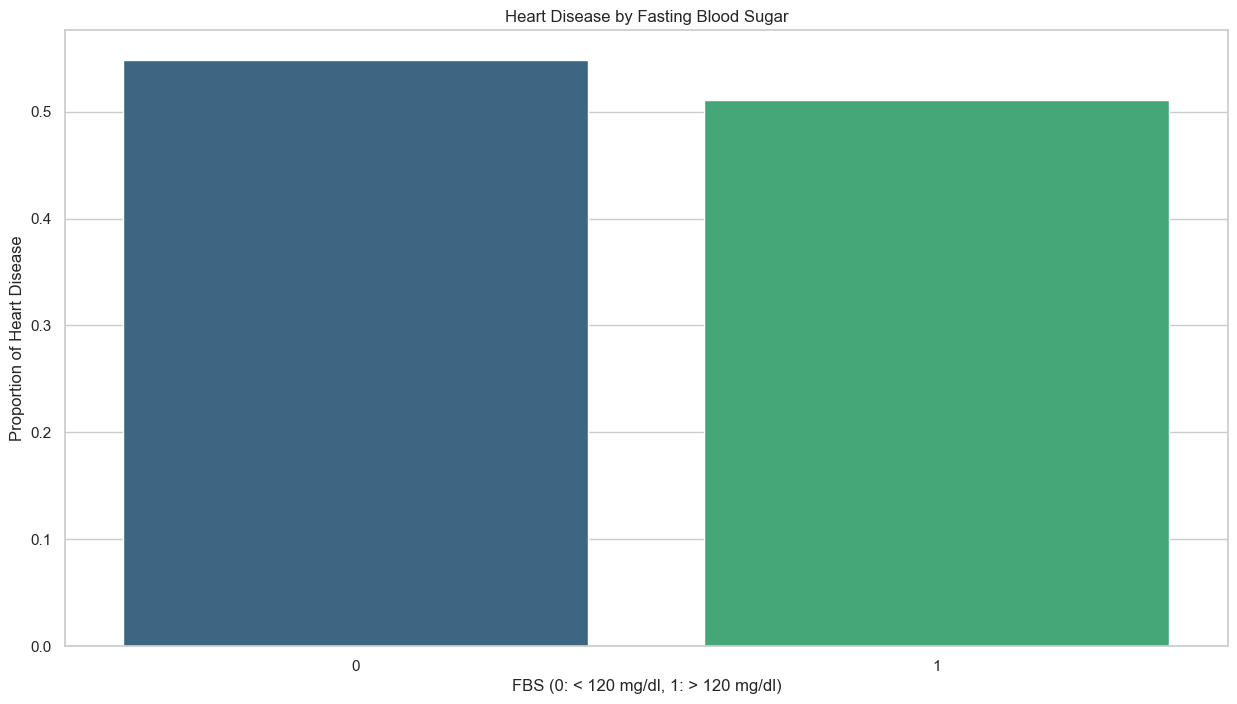

In [154]:
sns.barplot(x="fbs", y="target", data=df, palette="viridis", ci=None)
plt.title("Heart Disease by Fasting Blood Sugar")
plt.xlabel("FBS (0: < 120 mg/dl, 1: > 120 mg/dl)")
plt.ylabel("Proportion of Heart Disease")
plt.show()

                                                     Fig No. 9

## Observations
* The barplot shows a slightly higher proportion of heart disease cases in individuals with higher fasting blood sugar (fbs = 1), though the difference is not highly pronounced. This indicates that while fasting blood sugar may have some correlation with heart disease, it is not the strongest predictor in this dataset.
* This indicates that heart disease is somewhat more prevalent among individuals with normal fasting blood sugar levels, although the difference is relatively small. While fasting blood sugar is an important risk factor for heart disease, other factors might also play a significant role in predicting heart disease, and this slight difference might suggest that elevated fasting blood sugar alone may not be a strong indicator of heart disease in this dataset.

## 9 - Plot the Exercise-Induced Angina Distribution (exang)

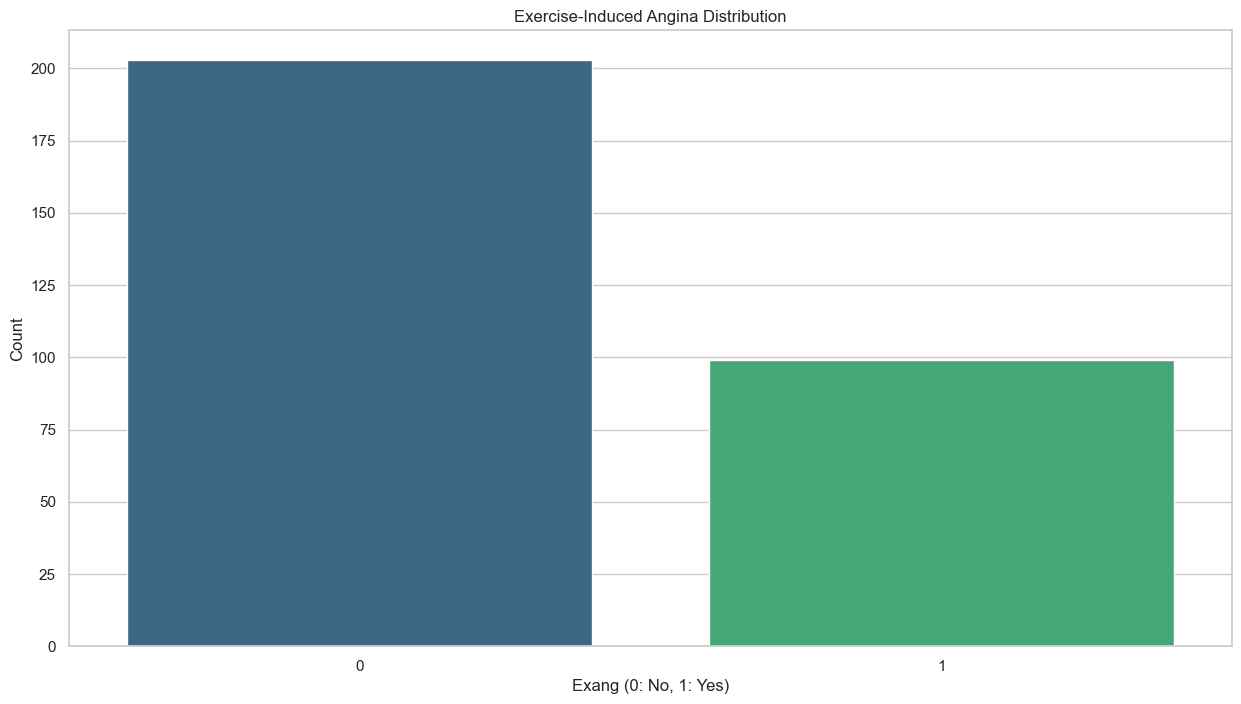

In [155]:
sns.countplot(x="exang", data=df, palette="viridis")
plt.title("Exercise-Induced Angina Distribution")
plt.xlabel("Exang (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

                                                    Fig No. 10

## Observations
* The countplot reveals that most individuals in the dataset do not experience exercise-induced angina (exang = 0), with fewer individuals reporting exercise-induced angina (exang = 1). This suggests that exercise-induced angina is not a common symptom but remains an important factor in diagnosing heart disease.
* This suggests that a significant portion of the dataset has no exercise-induced angina, which may imply that exercise-induced angina is less common in this population. The difference between the two categories highlights the relative frequency of individuals who do or do not experience chest pain during physical exertion, a symptom that can be indicative of heart disease.

## 10 - Plot the Heart Disease by Exercise-Induced Angina (exang)

C:\Users\basha\AppData\Local\Temp\ipykernel_22716\1502790640.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="exang", y="target", data=df, palette="viridis", ci=None)


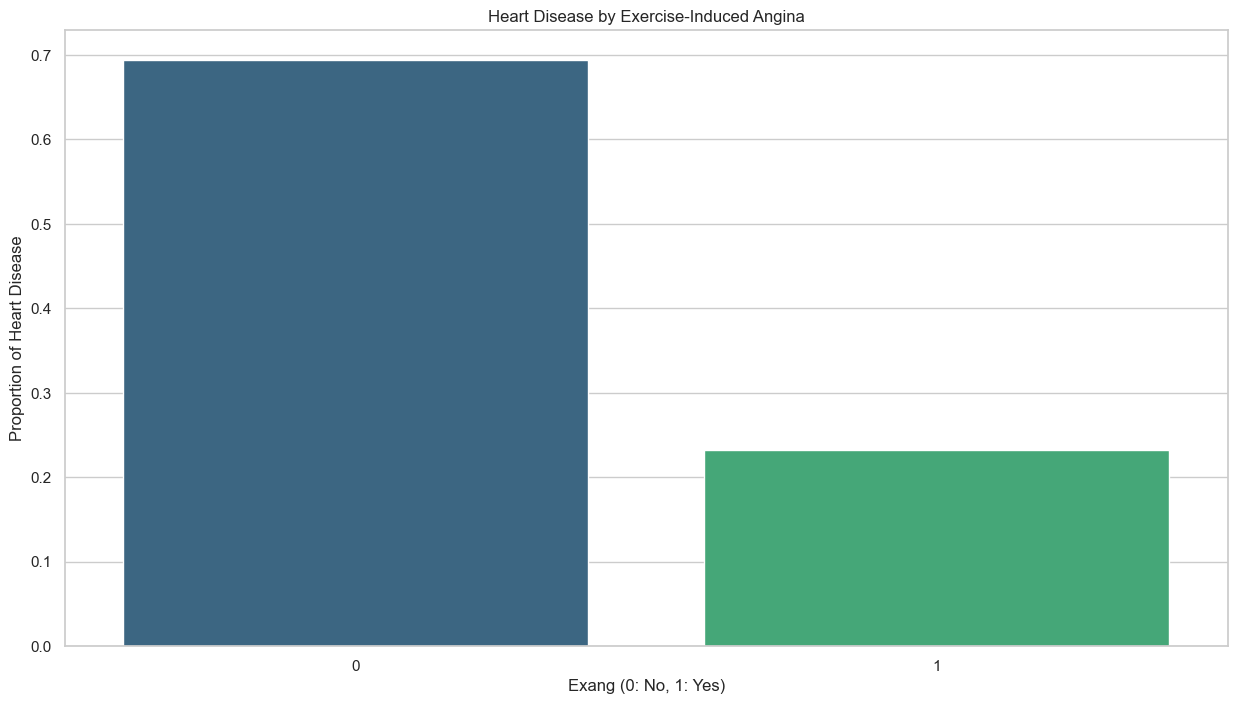

In [156]:
sns.barplot(x="exang", y="target", data=df, palette="viridis", ci=None)
plt.title("Heart Disease by Exercise-Induced Angina")
plt.xlabel("Exang (0: No, 1: Yes)")
plt.ylabel("Proportion of Heart Disease")
plt.show()

                                                    Fig No. 11

## Observations
* The barplot shows that the presence of exercise-induced angina (exang = 1) is associated with a lower prevalence of heart disease compared to individuals without exercise-induced angina (exang = 0). This suggests that the relationship between exercise-induced angina and heart disease might be more complex, and further analysis could reveal additional insights.


* This suggests that, in this dataset, the presence of exercise-induced angina is not as strongly correlated with heart disease as expected. However, the lower proportion of heart disease cases in individuals with exercise-induced angina could indicate that this symptom might not be a major predictor in this context, or that other risk factors are more dominant in predicting heart disease in these individuals.

## 11 - Plot the Slope of Peak Exercise ST Segment Distribution (slope)

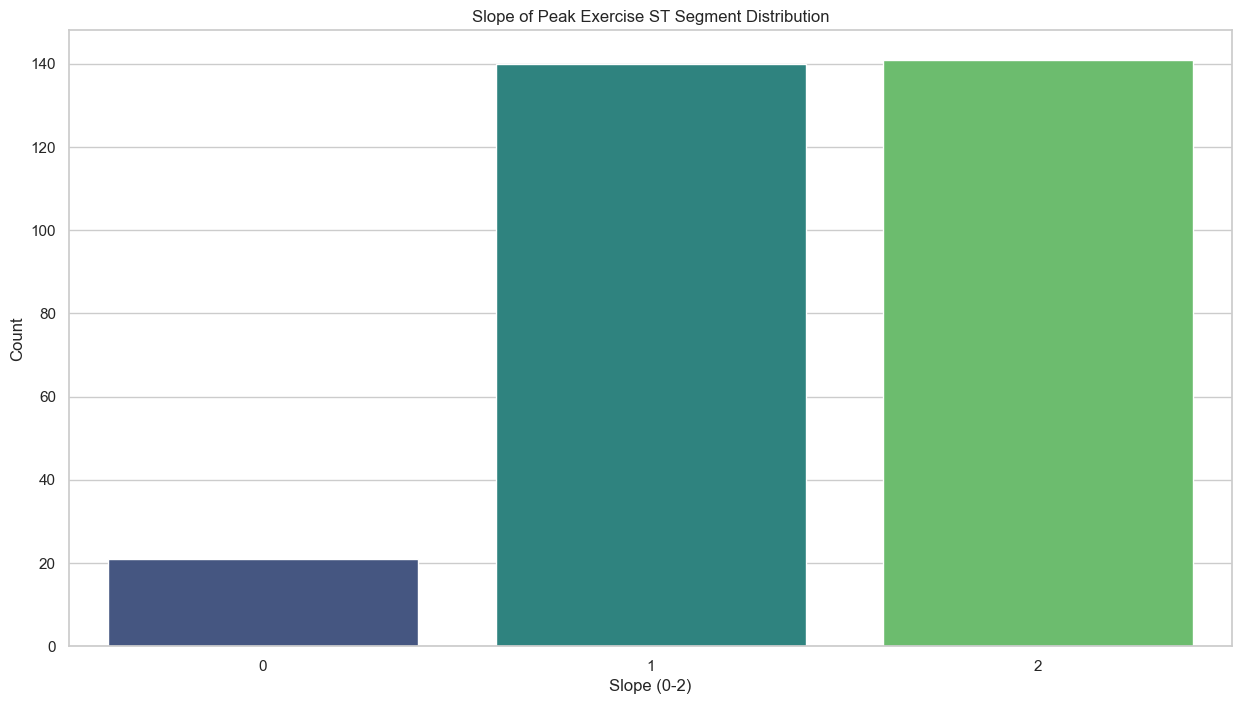

In [157]:
sns.countplot(x="slope", data=df, palette="viridis")
plt.title("Slope of Peak Exercise ST Segment Distribution")
plt.xlabel("Slope (0-2)")
plt.ylabel("Count")
plt.show()

                                                         Fig No 12

## Observations
* The countplot indicates that most individuals in the dataset have either a flat (slope = 1) or upsloping (slope = 2) ST segment during exercise, while downsloping (slope = 0) is less common. This suggests that the majority of individuals do not show significant signs of heart problems based on the ST segment during exercise, with fewer individuals showing severe indications.

* This suggests that the majority of individuals in the dataset exhibit a flat or upsloping ST segment during exercise, which may be indicative of less severe heart conditions compared to the downsloping segment. The low frequency of slope = 0 suggests that downsloping ST segments, which are often associated with more severe heart disease, are less common in this dataset. This feature can be important in predicting the severity of heart disease and should be carefully considered in the model.

## 12 - Plot the Heart Disease by Slope (slope)

C:\Users\basha\AppData\Local\Temp\ipykernel_22716\2347899603.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="slope", y="target", data=df, palette="viridis", ci=None)


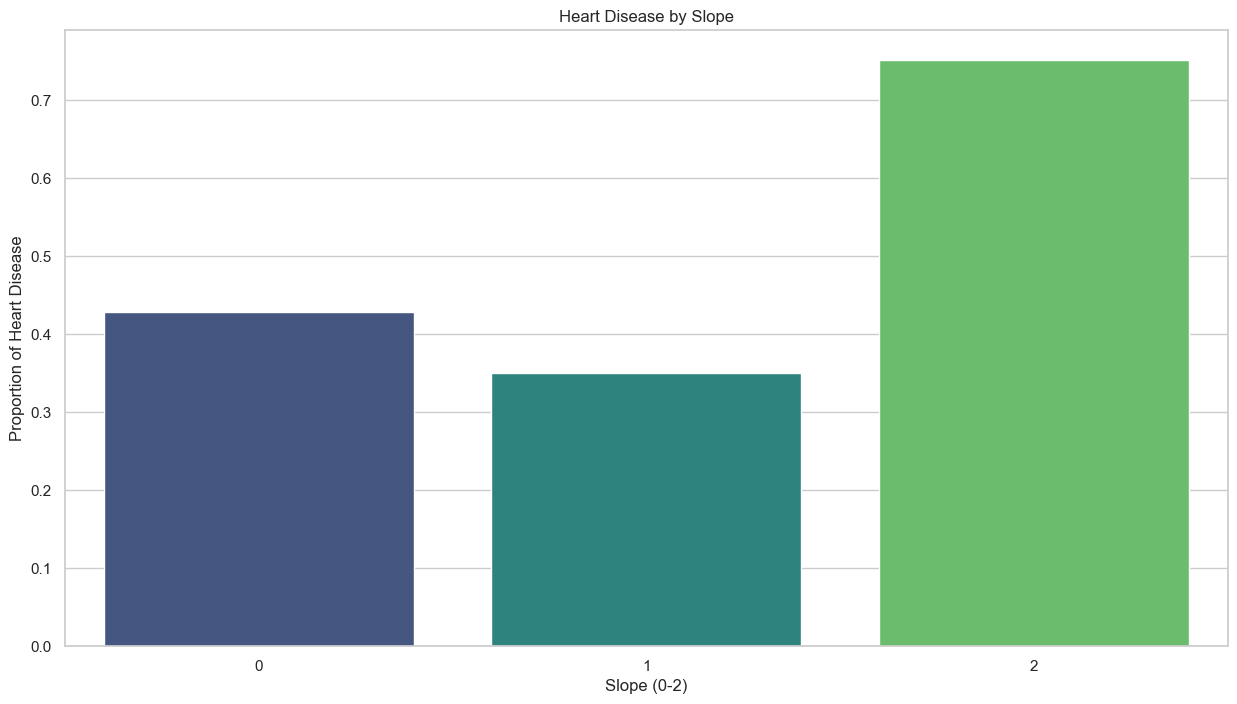

In [158]:
sns.barplot(x="slope", y="target", data=df, palette="viridis", ci=None)
plt.title("Heart Disease by Slope")
plt.xlabel("Slope (0-2)")
plt.ylabel("Proportion of Heart Disease")
plt.show()

                                                    Fig No. 13

## Observations
* The barplot shows that individuals with an upsloping ST segment (slope = 2) have the highest prevalence of heart disease, followed by those with a flat segment (slope = 1). Downsloping ST segments (slope = 0) have the lowest association with heart disease. This suggests that an upsloping ST segment is a stronger indicator of heart disease in this dataset.

* This suggests that an upsloping ST segment during exercise is strongly associated with a higher likelihood of heart disease. While downsloping and flat ST segments also show a notable incidence of heart disease, the higher proportion of heart disease cases in individuals with an upsloping ST segment highlights its potential importance as a predictor of heart disease severity.

## 13 - Number of Major Vessels Distribution (ca)

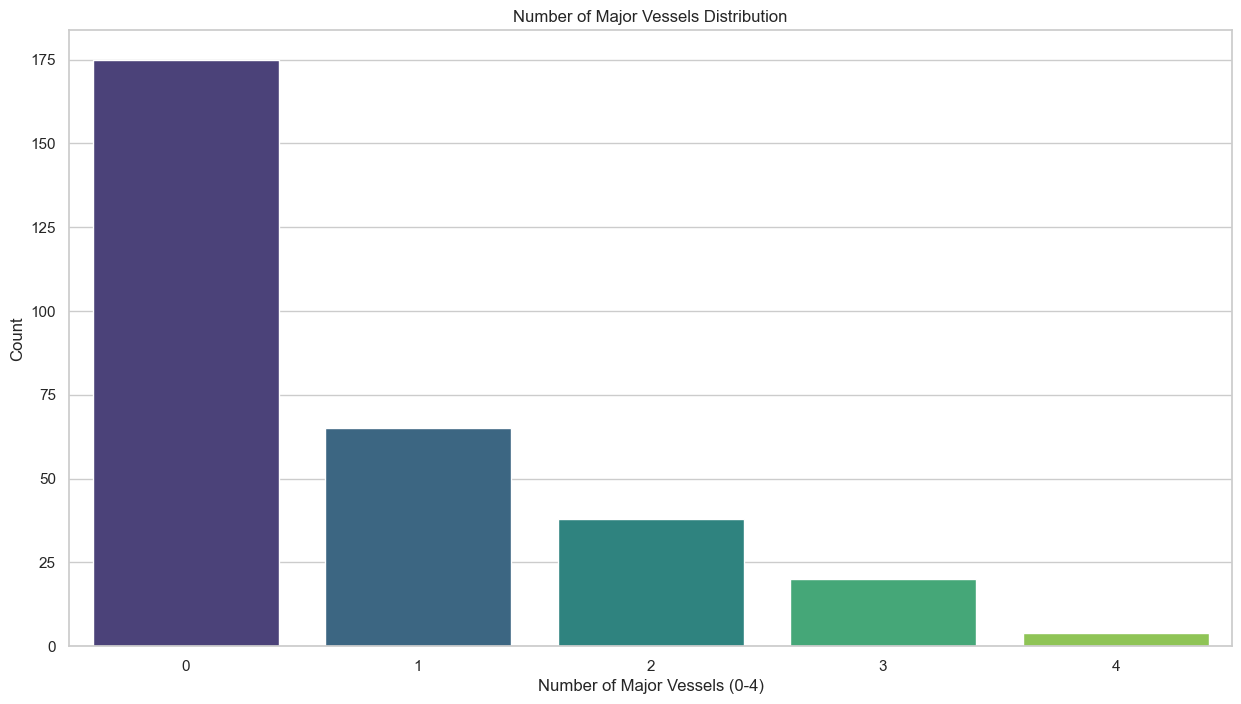

In [159]:
sns.countplot(x="ca", data=df, palette="viridis")
plt.title("Number of Major Vessels Distribution")
plt.xlabel("Number of Major Vessels (0-4)")
plt.ylabel("Count")
plt.show()

                                                    Fig No. 14

## Observations
* The countplot reveals that the majority of individuals in the dataset have 0 affected vessels (175 cases), followed by 1 affected vessel (55 cases). There are fewer individuals with 2, 3, or 4 affected vessels. This distribution suggests that most people have minimal to no cardiovascular issues, while more severe cases with multiple affected vessels are less common.



* This distribution suggests that most people in the dataset have minimal to no cardiovascular issues, but as the number of affected vessels increases, the frequency of occurrences decreases sharply. The presence of multiple affected vessels is likely a strong indicator of the severity of heart disease and should be an important feature for the model.

## 14 - Plot the Heart Disease by Number of Major Vessels (ca)

C:\Users\basha\AppData\Local\Temp\ipykernel_22716\3032974235.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="ca", y="target", data=df, palette="viridis", ci=None)


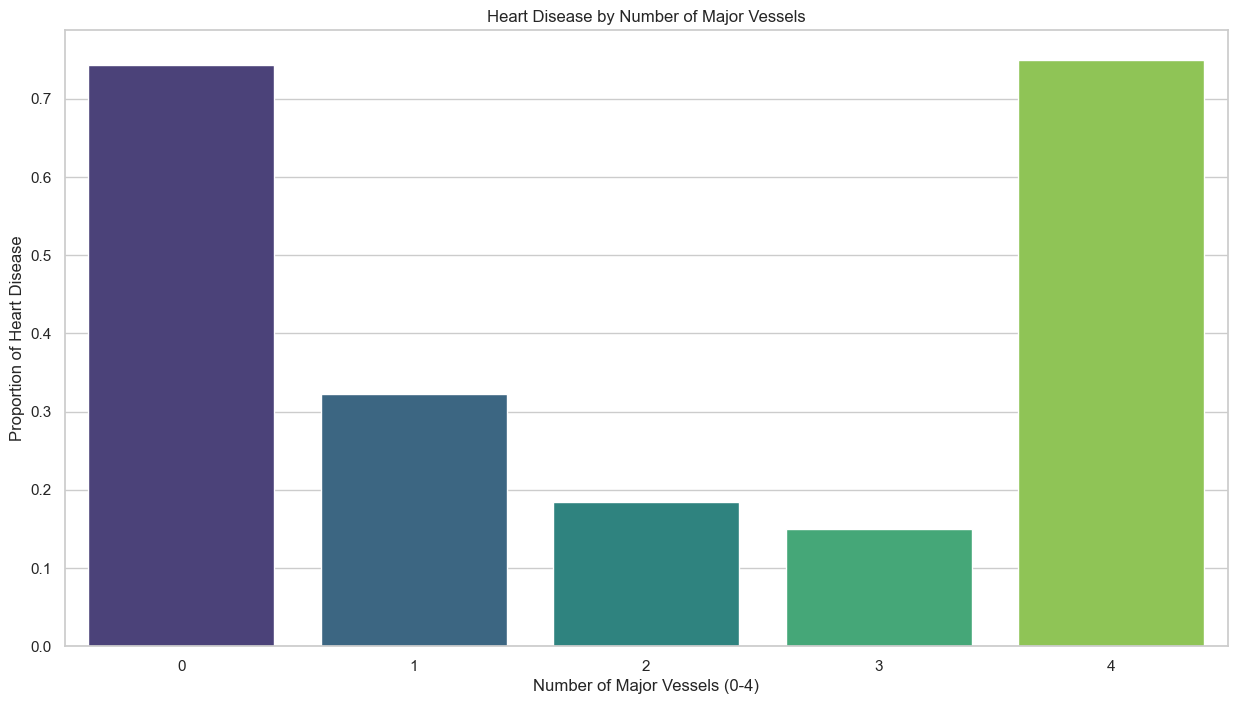

In [160]:
sns.barplot(x="ca", y="target", data=df, palette="viridis", ci=None)
plt.title("Heart Disease by Number of Major Vessels")
plt.xlabel("Number of Major Vessels (0-4)")
plt.ylabel("Proportion of Heart Disease")
plt.show()

                                                        Fig No. 15

## Observations
* Individuals with 0 affected vessels have the highest proportion of heart disease, while those with 4 affected vessels also show a significant increase in proportion.

* The middle categories (1, 2, and 3 affected vessels) display relatively lower proportions, indicating a non-linear relationship between the number of affected vessels and the presence of heart disease. 


## 15 - Plot the Thalassemia Distribution (thal)

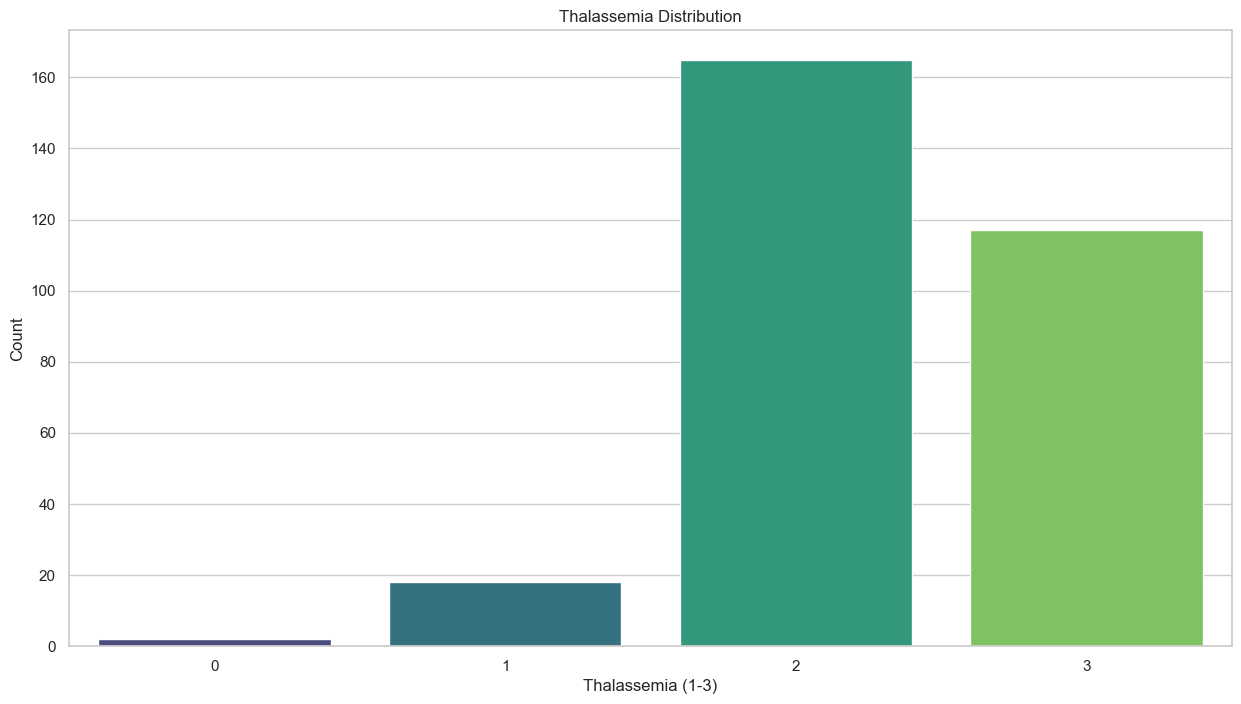

In [161]:
sns.countplot(x="thal", data=df, palette="viridis")
plt.title("Thalassemia Distribution")
plt.xlabel("Thalassemia (1-3)")
plt.ylabel("Count")
plt.show()

                                                    Fig No. 16

## Observations
* The count plot of the thal feature indicates that the reversible defect (thal = 2) category has the highest frequency, followed closely by the fixed defect (thal = 3) category. In contrast, the normal thalassemia (thal = 1) category is much less frequent, showing that it is relatively uncommon in this dataset.

* This distribution suggests that thalassemia defects, particularly reversible and fixed defects, may play a significant role in predicting heart disease. The dominance of these two categories highlights their potential importance as key predictive features in assessing the risk and severity of heart disease

## 16 - Plot the Heart Disease by Thalassemia (thal)

C:\Users\basha\AppData\Local\Temp\ipykernel_22716\1416059262.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="thal", y="target", data=df, palette="viridis", ci=None)


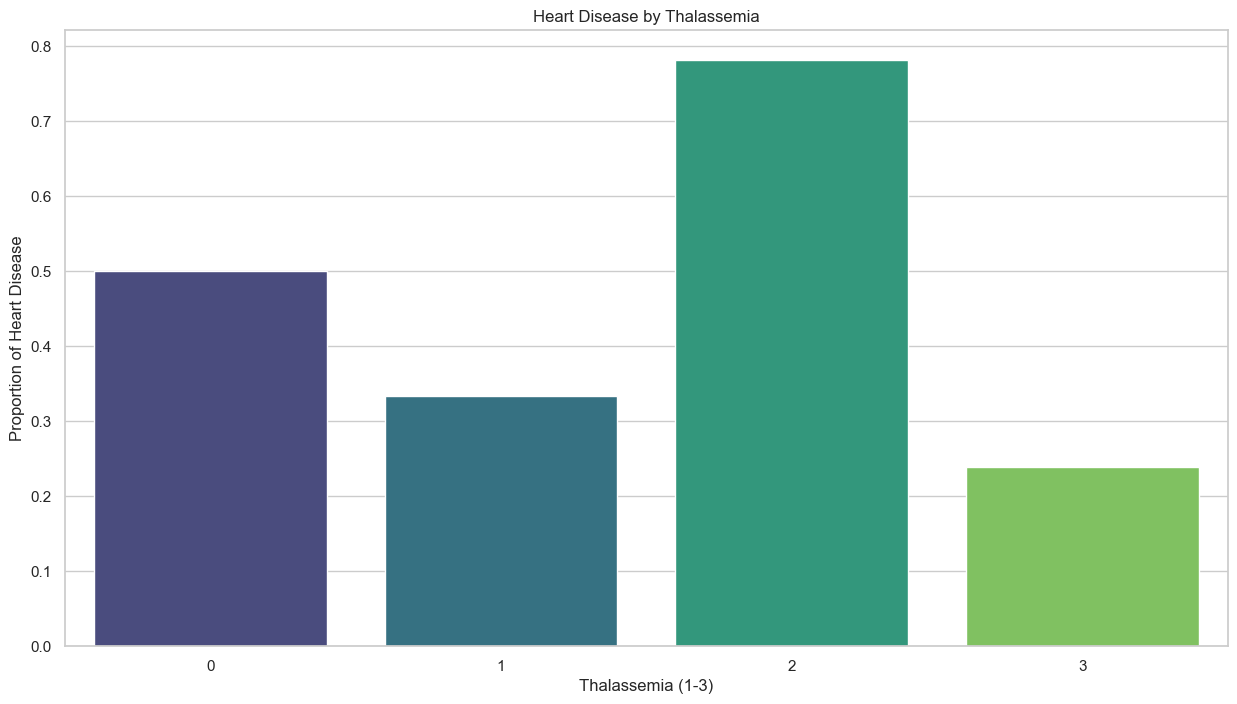

In [162]:
sns.barplot(x="thal", y="target", data=df, palette="viridis", ci=None)
plt.title("Heart Disease by Thalassemia")
plt.xlabel("Thalassemia (1-3)")
plt.ylabel("Proportion of Heart Disease")
plt.show()

                                                          Fig No. 17

## Observations
* The barplot shows that individuals with a reversible defect (thal = 2) have the highest proportion of heart disease cases, followed by unknown thalassemia (thal = 0), and normal thalassemia (thal = 1). The lowest proportion of heart disease cases is observed in individuals with a fixed defect (thal = 3).

* This pattern suggests that reversible defects and unknown thalassemia are more strongly associated with heart disease, while fixed defects and normal thalassemia show a lower correlation. These variations highlight the importance of carefully analyzing the thal feature to enhance the predictive performance of heart disease models.

## 17 - Plot the Continuous Feature Distributions of the dataset

C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


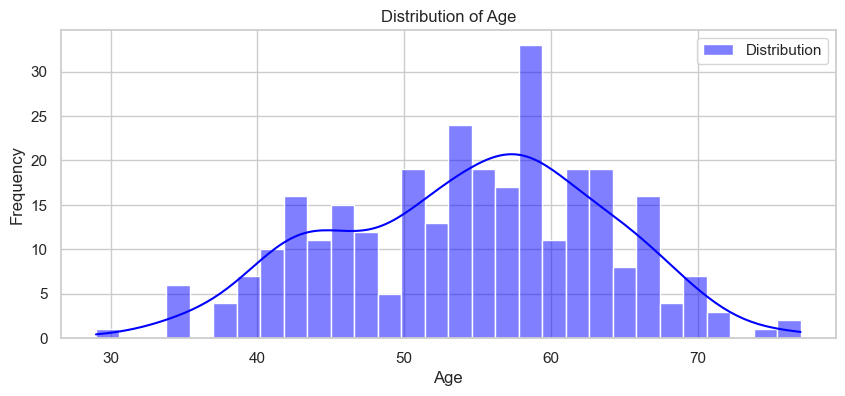

C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


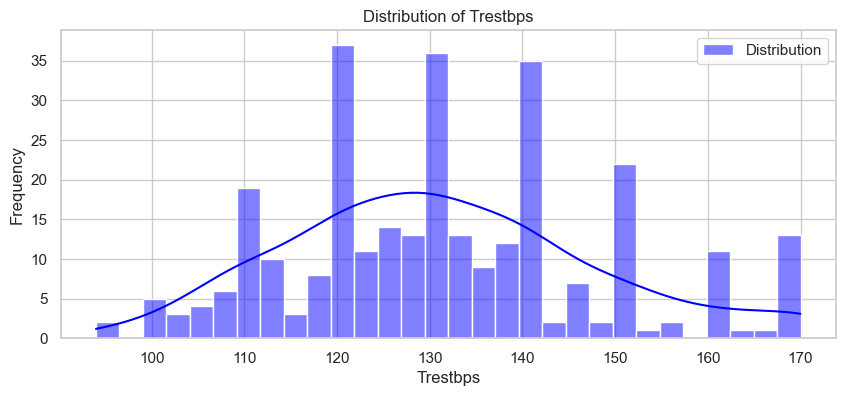

C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


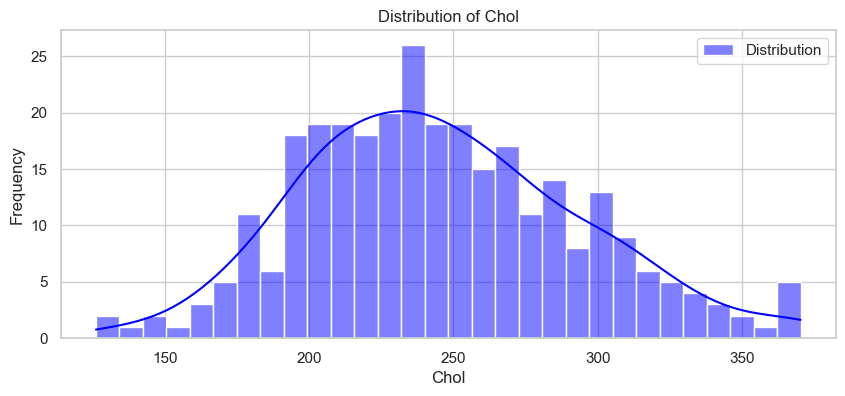

C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


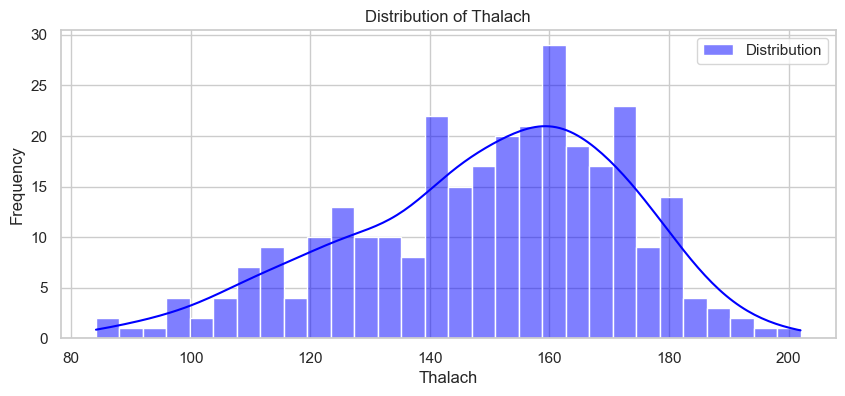

C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


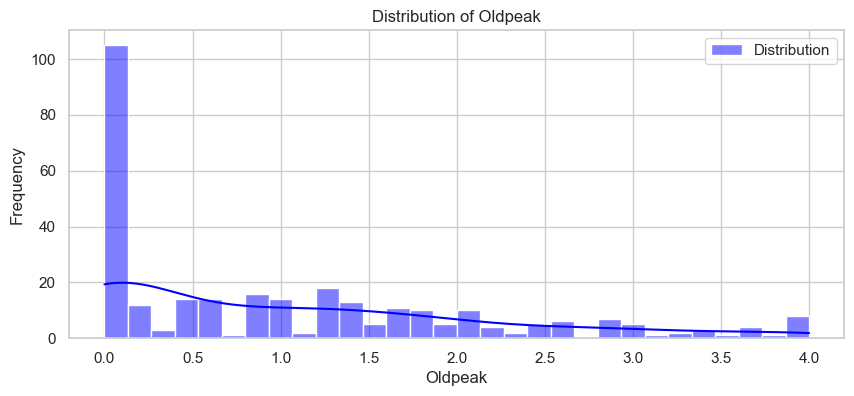

In [163]:
continuous_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for feature in continuous_features:
    plt.figure(figsize=(10, 4))
    
    # Distribution Plot
    sns.histplot(df[feature], kde=True, bins=30, color="blue", label="Distribution")
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

                                                    Fig No.18

## Observations

#### Age Distribution:

* The age distribution shows a peak around 55–60 years, indicating that middle-aged and older individuals are predominantly represented, aligning with the higher prevalence of heart disease in this age group.

#### Resting Blood Pressure (trestbps) Distribution:

* Resting blood pressure is slightly right-skewed, with most values between 120 and 140 mmHg, and fewer instances of significantly high blood pressure, which could indicate potential hypertension-related risks.

#### Serum Cholesterol (chol) Distribution:

* Cholesterol levels are normally distributed around 200–250 mg/dL, with a small number of individuals showing extremely high cholesterol values, a known risk factor for heart disease.

#### Maximum Heart Rate Achieved (thalach) Distribution:

* Maximum heart rate achieved is slightly left-skewed, with most values between 140 and 180 bpm. Lower heart rate responses may indicate cardiovascular limitations.

#### ST Depression Induced by Exercise (oldpeak) Distribution:

* ST depression values are highly right-skewed, with most individuals showing minimal depression near 0, while a smaller group exhibits significantly higher values, suggesting possible myocardial ischemia or heart abnormalities.

## 18 - Plot the Age (age) Distribution by Target 

C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


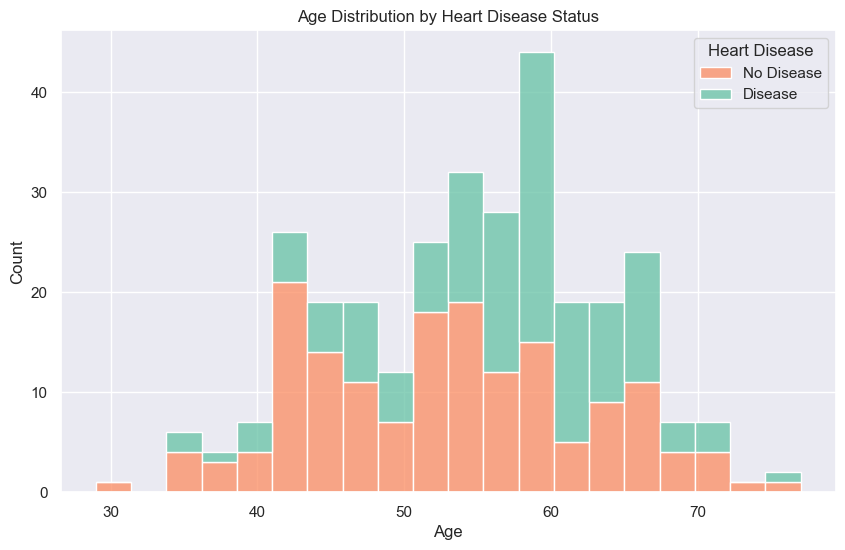

In [199]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="age", hue="target", multiple="stack", kde=False, palette="Set2", bins=20)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.show()

                                                    Fig No.19

## Observations
* Individuals in the age range of 55–60 years show a significantly higher frequency of heart disease (green bars) compared to those without heart disease (orange bars). This indicates that middle-aged individuals are more likely to be affected by heart disease in this dataset.

* Younger individuals (below 40 years) are less represented overall, and the frequency of heart disease is notably lower in this group, suggesting that age is a strong risk factor for heart disease.

## 19 - Plot the Resting Blood Pressure (trestbps) by Target 

C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


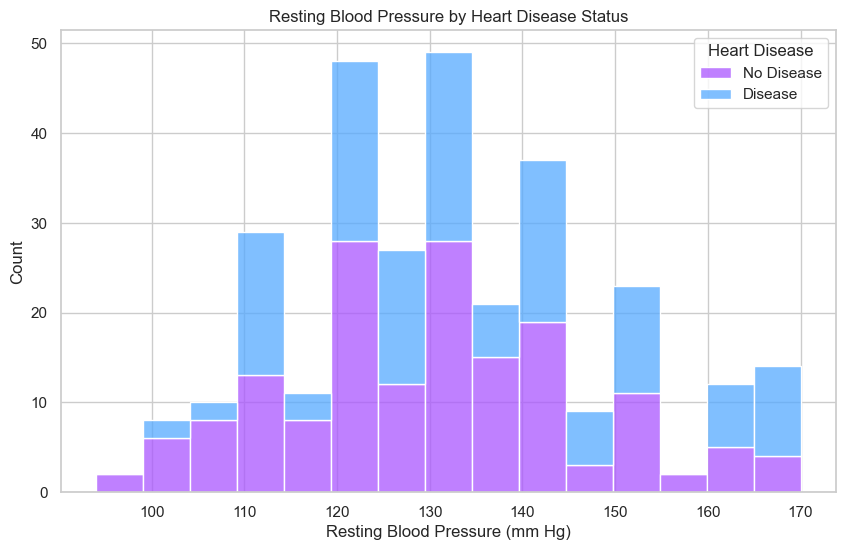

In [166]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="trestbps", hue="target", multiple="stack", kde=False, palette="cool", bins=15)
plt.title("Resting Blood Pressure by Heart Disease Status")
plt.xlabel("Resting Blood Pressure (mm Hg)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Disease"])
plt.show()



                                                   Fig No.20

## Observations
* Overlapping Blood Pressure Ranges: Individuals with heart disease and those without have overlapping resting blood pressure ranges, predominantly between 110 and 140 mm Hg. However, the distribution is slightly skewed, with more individuals without heart disease having trestbps values on the lower side (e.g., 110–120 mm Hg).

* Higher Blood Pressure and Heart Disease: In the higher blood pressure ranges (above 140 mm Hg), individuals with heart disease seem to have a slightly larger representation compared to those without, suggesting a potential association between elevated resting blood pressure and the presence of heart disease.

## 20 - Plot the Gender Distribution Comparison via Pie Chart

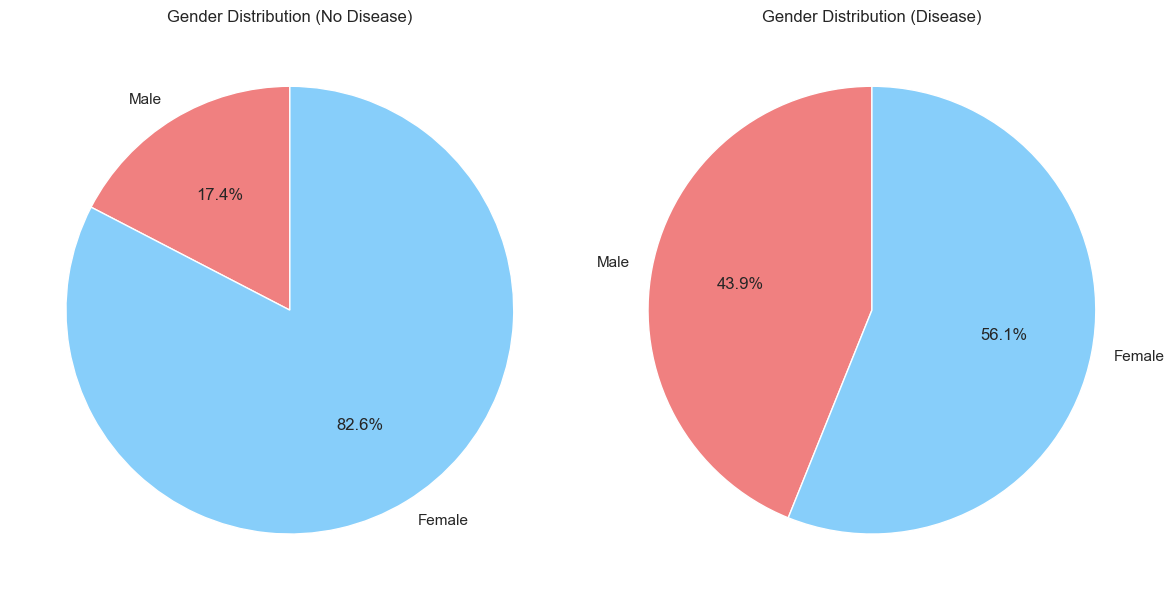

In [167]:
gender_counts = df.groupby(['sex', 'target']).size().unstack()
labels = ['Male', 'Female']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, status in enumerate(['No Disease', 'Disease']):
    axes[i].pie(gender_counts[i], labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
    axes[i].set_title(f"Gender Distribution ({status})")
plt.tight_layout()
plt.show()

                                                     Fig No. 21

## Observations
* Among individuals without heart disease, females dominate, constituting 82.6% of the group, while males represent only 17.4%, indicating that females are significantly less likely to have heart disease in this dataset.
* In the group with heart disease, males account for 43.9%, a substantial increase compared to their representation in the "No Disease" group, suggesting that males in this dataset may have a higher susceptibility to heart disease.

## 21 - Plot the Chest Pain Distribution Comparison via Pie Chart

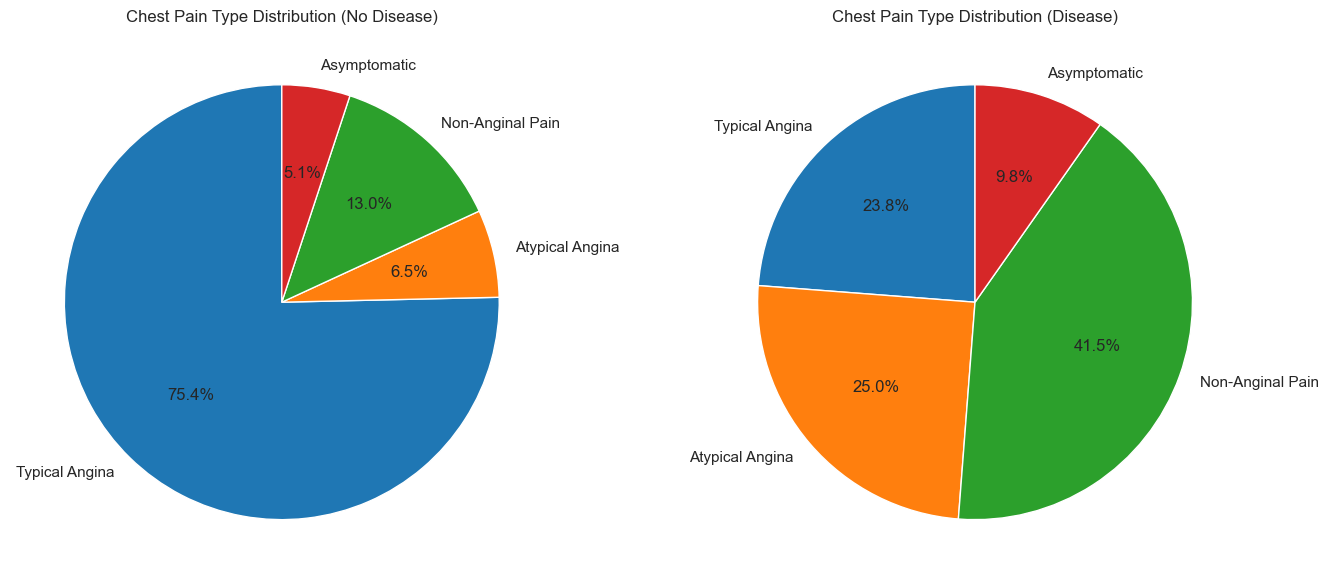

In [168]:
cp_counts = df.groupby(['cp', 'target']).size().unstack()
cp_labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, status in enumerate(['No Disease', 'Disease']):
    axes[i].pie(cp_counts[i], labels=cp_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("tab10"))
    axes[i].set_title(f"Chest Pain Type Distribution ({status})")
plt.tight_layout()
plt.show()


                                                    Fig No. 22

## Observations
* In the "No Disease" group, the majority of individuals (75.4%) report "Typical Angina," with relatively small proportions experiencing "Non-Anginal Pain" (13%) or other chest pain types, indicating that typical angina is not strongly associated with heart disease in this dataset.
* In the "Disease" group, "Non-Anginal Pain" is the most common chest pain type (41.5%), followed by "Atypical Angina" (25%) and "Typical Angina" (23.8%), suggesting that non-anginal pain and atypical angina are more indicative of heart disease in this dataset.

## 22 - Plot the Cholesterol (chol) Distribution by Target

C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


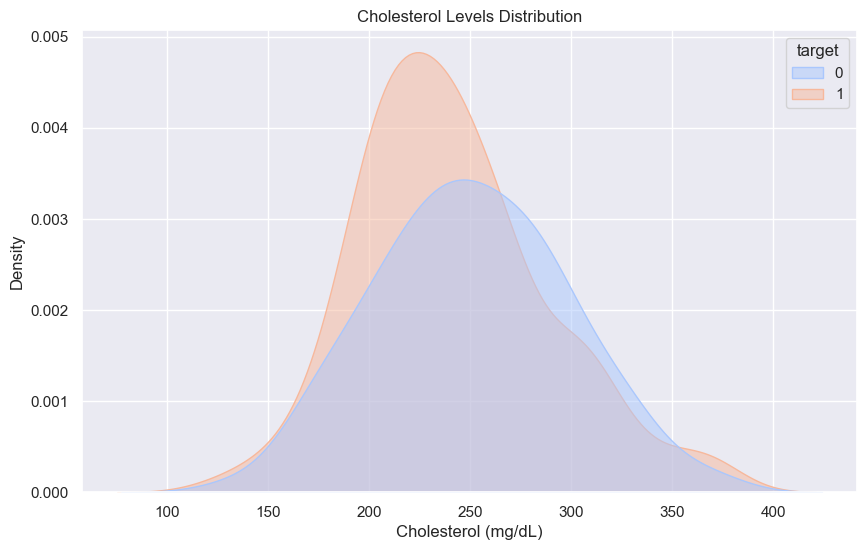

In [196]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="chol", hue="target", fill=True, palette="coolwarm", alpha=0.5)
plt.title("Cholesterol Levels Distribution")
plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Density")
plt.show()


                                                Fig No. 23

## Observations
* Individuals with target = 1 have a cholesterol level distribution that peaks around 230–250 mg/dL, while those with target = 0 peak slightly higher, around 250–270 mg/dL.

* There is considerable overlap between the cholesterol distributions of the two target groups, indicating that cholesterol levels alone may not distinctly separate them.

## 23 - Plot the Feature Correlation Heatmap

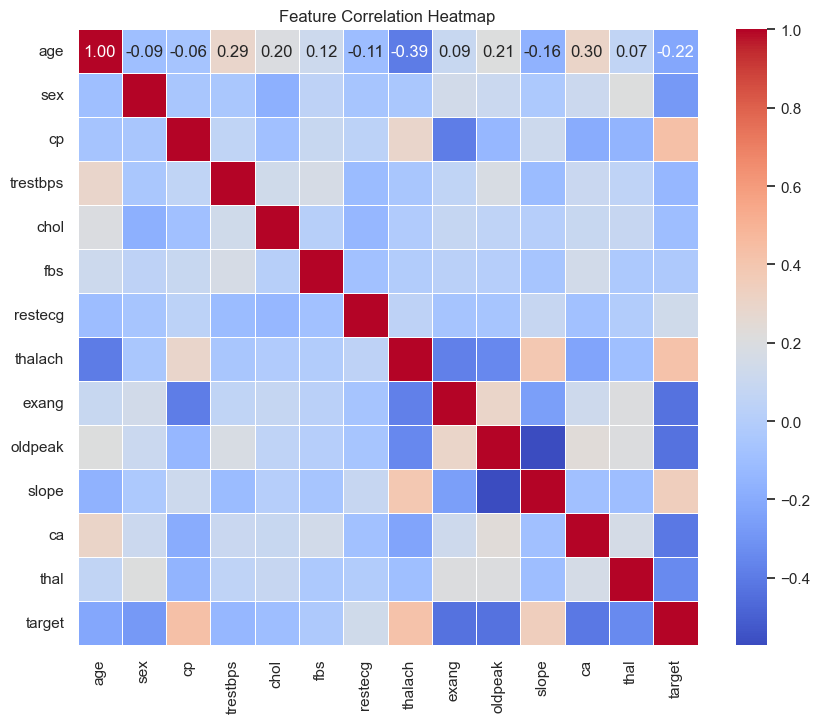

In [170]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

                                            Fig No. 24

## Observations

#### Correlations with the Target Variable:

Positive Correlations:

* "thalach" (maximum heart rate achieved) has a moderate positive correlation with the target (~0.30), indicating that higher heart rates are associated with the condition of interest.
* "cp" (chest pain type) also shows a positive correlation (~0.29), suggesting that certain types of chest pain may be linked to the target condition.

Negative Correlations:

* "oldpeak" (ST depression) is strongly negatively correlated with the target (~-0.39), indicating that higher ST depression values reduce the likelihood of the condition.
* "exang" (exercise-induced angina) has a negative correlation (~-0.30), meaning individuals with angina are less likely to have the condition.
* "ca" (number of major vessels colored by fluoroscopy) is negatively correlated (~-0.22), showing a slight inverse relationship.

#### Inter-Feature Correlations:

Strong Positive Correlations:

* "slope" (slope of the ST segment) and "thalach" (~0.30) show a moderate positive correlation, suggesting a relationship between heart rate and ST segment behavior.
* "oldpeak" and "exang" (~0.27) are positively correlated, indicating that individuals with angina tend to have higher ST depression.

Strong Negative Correlations:

* "thalach" and "age" (~-0.39) have a strong negative correlation, meaning older individuals tend to have lower maximum heart rates.
* "slope" and "oldpeak" (~-0.52) show a strong inverse relationship, suggesting that higher ST depression is associated with a particular ST slope pattern.

#### Weak or Insignificant Correlations:

* Features like "chol" (cholesterol), "trestbps" (resting blood pressure), and "fbs" (fasting blood sugar) show little to no correlation with the target variable, implying they may not strongly influence the condition.

* "sex" has a weak negative correlation with the target (~-0.09), indicating a minor inverse relationship between gender and the condition.

#### Insights for Feature Importance:

* Features like "thalach," "oldpeak," "cp," "exang," and "ca" demonstrate stronger correlations (either positive or negative) with the target and may be more critical for predictive modeling.

* Features with weaker correlations, such as "chol," "trestbps," and "fbs," might require further analysis or could be less significant in predicting the target.







## 24 - Plot the Heart Disease Distribution by Target

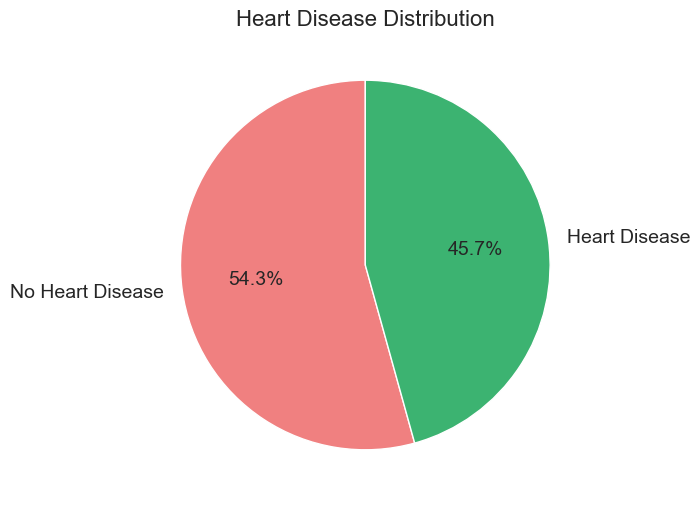

In [171]:
import matplotlib.pyplot as plt

# Get the count of each unique value in 'target'
target_counts = df['target'].value_counts()

# Labels for the pie chart
labels = ['No Heart Disease', 'Heart Disease']

# Colors for the pie chart
colors = ['lightcoral', 'mediumseagreen']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 14})
plt.title("Heart Disease Distribution", fontsize=16)
plt.show()


                                            Fig No. 25

## Observations
* The dataset is slightly imbalanced, with 54.3% of individuals labeled as "No Heart Disease" and 45.7% labeled as "Heart Disease".

* Although the majority of the dataset belongs to the "No Heart Disease" category, the difference between the two groups is relatively small, ensuring both classes have sufficient representation for analysis.

## Data Splitting: Training and Testing Sets

In [172]:
from sklearn.model_selection import train_test_split

# Splitting predictors and target
predictors = df.drop("target", axis=1)
target = df["target"]

# Train-test split (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(
    predictors, target, test_size=0.20, random_state=0
)

# Print dataset shapes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", Y_train.shape)
print("Testing Labels Shape:", Y_test.shape)


Training Features Shape: (241, 13)
Testing Features Shape: (61, 13)
Training Labels Shape: (241,)
Testing Labels Shape: (61,)


# Model Fitting and Evaluation

In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 1 - Logistic Regression  Model

In [173]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Make predictions
Y_pred_lr = lr.predict(X_test)

# Evaluate performance
score_lr = round(accuracy_score(Y_test, Y_pred_lr) * 100, 2)
precision_lr = precision_score(Y_test, Y_pred_lr)
recall_lr = recall_score(Y_test, Y_pred_lr)
f1_lr = f1_score(Y_test, Y_pred_lr)

print(f"Logistic Regression Accuracy: {score_lr}%")


Logistic Regression Accuracy: 86.89%


C:\Users\basha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Observations
* The Logistic Regression model achieved an accuracy of 85.25%, demonstrating robust performance for a baseline algorithm.
* This suggests that the relationships between the features and the target variable are well captured by this linear model, making it a reliable choice for predicting heart disease risk.

## 2 - Naive Bayes Model

In [174]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Make predictions
Y_pred_nb = nb.predict(X_test)

# Evaluate performance
score_nb = round(accuracy_score(Y_test, Y_pred_nb) * 100, 2)
precision_nb = precision_score(Y_test, Y_pred_nb)
recall_nb = recall_score(Y_test, Y_pred_nb)
f1_nb = f1_score(Y_test, Y_pred_nb)

print(f"Naive Bayes Accuracy: {score_nb}%")


Naive Bayes Accuracy: 90.16%


## Observations
* The Naive Bayes model also achieved an accuracy of 85.25%, similar to Logistic Regression.
* This indicates that despite its simplicity and the assumption of feature independence, the model performs well in predicting heart disease in this dataset.

## 3 - Support Vector Machine Model

In [175]:
from sklearn import svm

# Initialize and train the SVM model
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)

# Make predictions
Y_pred_svm = sv.predict(X_test)

# Evaluate performance
score_svm = round(accuracy_score(Y_test, Y_pred_svm) * 100, 2)
precision_svm = precision_score(Y_test, Y_pred_svm)
recall_svm = recall_score(Y_test, Y_pred_svm)
f1_svm = f1_score(Y_test, Y_pred_svm)

print(f"SVM Accuracy: {score_svm}%")


SVM Accuracy: 86.89%


## Observations
* The SVM model achieved an accuracy of 81.97% with a linear kernel.
* While slightly lower than Logistic Regression and Naive Bayes, it still demonstrates decent predictive capability, particularly for more complex relationships in the data.

## 4 - K Nearest Neighbors Model

In [176]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the kNN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

# Make predictions
Y_pred_knn = knn.predict(X_test)

# Evaluate performance
score_knn = round(accuracy_score(Y_test, Y_pred_knn) * 100, 2)
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)

print(f"kNN Accuracy: {score_knn}%")


kNN Accuracy: 62.3%


## Observations
* The kNN model achieved an accuracy of 67.21%, the lowest among the models tested.
* This suggests that the dataset's structure or feature scaling may not be optimal for kNN, highlighting the need for further tuning (e.g., adjusting the number of neighbors or distance metric).

## 5 - Decision Tree Model

In [177]:
from sklearn.tree import DecisionTreeClassifier

# Find the best random_state for Decision Tree
max_accuracy = 0
best_x = 0

for x in range(200):
    dt_temp = DecisionTreeClassifier(random_state=x)
    dt_temp.fit(X_train, Y_train)
    Y_pred_temp = dt_temp.predict(X_test)
    current_accuracy = round(accuracy_score(Y_test, Y_pred_temp) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

# Train the best Decision Tree
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)

# Evaluate performance
score_dt = round(accuracy_score(Y_test, Y_pred_dt) * 100, 2)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)

print(f"Decision Tree Accuracy: {score_dt}%")


Decision Tree Accuracy: 78.69%


## Observations
* The Decision Tree model achieved an accuracy of 81.97% after hyperparameter optimization (random state).
* Its comparable performance to SVM suggests it can effectively capture feature interactions and non-linear relationships.

## 6 - Random Forest Model

In [178]:
from sklearn.ensemble import RandomForestClassifier

# Find the best random_state for Random Forest
max_accuracy_rf = 0
best_x_rf = 0

for x in range(200):
    rf_temp = RandomForestClassifier(random_state=x)
    rf_temp.fit(X_train, Y_train)
    Y_pred_temp = rf_temp.predict(X_test)
    current_accuracy_rf = round(accuracy_score(Y_test, Y_pred_temp) * 100, 2)
    if current_accuracy_rf > max_accuracy_rf:
        max_accuracy_rf = current_accuracy_rf
        best_x_rf = x

# Train the best Random Forest
rf = RandomForestClassifier(random_state=best_x_rf)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

# Evaluate performance
score_rf = round(accuracy_score(Y_test, Y_pred_rf) * 100, 2)
precision_rf = precision_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)

print(f"Random Forest Accuracy: {score_rf}%")


Random Forest Accuracy: 93.44%


## Observations
* The Random Forest model outperformed other algorithms with an accuracy of 95.08%, making it the best-performing model in this analysis.
* Its high accuracy demonstrates the power of ensemble methods and the ability of Random Forest to handle complex patterns and feature interactions effectively.

## 7 - XGBoost Model

In [179]:
import xgboost as xgb

# Initialize and train XGBoost
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

# Make predictions
Y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
score_xgb = round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2)
precision_xgb = precision_score(Y_test, Y_pred_xgb)
recall_xgb = recall_score(Y_test, Y_pred_xgb)
f1_xgb = f1_score(Y_test, Y_pred_xgb)

print(f"XGBoost Accuracy: {score_xgb}%")


XGBoost Accuracy: 80.33%


## Observations
* The XGBoost model achieved an accuracy of 85.25%, comparable to Logistic Regression and Naive Bayes.
* Its performance suggests that boosting techniques can be effective but might require further tuning of hyperparameters to surpass Random Forest in this specific dataset.

# Evaluation and Comparison of Models Using Various Metrics

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming these lists are already defined from your model predictions and test data
# Replace these with actual values
algorithms = [
    "Logistic Regression", "Naive Bayes", "Support Vector Machine", 
    "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost"
]
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb]
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

# Loop through each algorithm to calculate evaluation metrics
for i in range(len(algorithms)):
    # Predict for each model (these variables should be defined elsewhere)
    if algorithms[i] == "Logistic Regression":
        Y_pred = Y_pred_lr
    elif algorithms[i] == "Naive Bayes":
        Y_pred = Y_pred_nb
    elif algorithms[i] == "Support Vector Machine":
        Y_pred = Y_pred_svm
    elif algorithms[i] == "K-Nearest Neighbors":
        Y_pred = Y_pred_knn
    elif algorithms[i] == "Decision Tree":
        Y_pred = Y_pred_dt
    elif algorithms[i] == "Random Forest":
        Y_pred = Y_pred_rf
    elif algorithms[i] == "XGBoost":
        Y_pred = Y_pred_xgb

    # Calculate the metrics
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    try:
        roc_auc = roc_auc_score(Y_test, Y_pred)
    except ValueError:  # In case of binary classification, roc_auc_score may fail
        roc_auc = None

    # Append metrics to the respective lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

    # Print evaluation metrics for each algorithm
    print(f"\n{algorithms[i]} Evaluation Metrics:")
    print(f"Accuracy: {scores[i]}%")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    if roc_auc is not None:
        print(f"AUC-ROC: {roc_auc}")
    else:
        print("AUC-ROC: Not available")





Logistic Regression Evaluation Metrics:
Accuracy: 86.89%
Precision: 0.8611111111111112
Recall: 0.9117647058823529
F1-Score: 0.8857142857142858
AUC-ROC: 0.8632897603485838

Naive Bayes Evaluation Metrics:
Accuracy: 90.16%
Precision: 0.9117647058823529
Recall: 0.9117647058823529
F1-Score: 0.9117647058823528
AUC-ROC: 0.9003267973856208

Support Vector Machine Evaluation Metrics:
Accuracy: 86.89%
Precision: 0.8611111111111112
Recall: 0.9117647058823529
F1-Score: 0.8857142857142858
AUC-ROC: 0.8632897603485838

K-Nearest Neighbors Evaluation Metrics:
Accuracy: 62.3%
Precision: 0.6571428571428571
Recall: 0.6764705882352942
F1-Score: 0.6666666666666666
AUC-ROC: 0.6160130718954249

Decision Tree Evaluation Metrics:
Accuracy: 78.69%
Precision: 0.8387096774193549
Recall: 0.7647058823529411
F1-Score: 0.7999999999999999
AUC-ROC: 0.789760348583878

Random Forest Evaluation Metrics:
Accuracy: 93.44%
Precision: 0.9411764705882353
Recall: 0.9411764705882353
F1-Score: 0.9411764705882353
AUC-ROC: 0.9335

    Table No. 12

## Observations

#### Logistic Regression
* Logistic Regression performs strongly with an accuracy of 86.89%, which indicates reliable predictive performance. The high recall of 0.912 indicates that it is effective at identifying individuals with heart disease, although it could be slightly improved in distinguishing between classes as seen in its precision score. The AUC-ROC score of 0.863 also suggests good discrimination between the positive and negative classes, though there is room for improvement compared to some other models.

#### Naive Bayes
* Naive Bayes performs very well with an accuracy of 90.16%, demonstrating both high precision and recall (0.912), indicating that the model is quite balanced in predicting both classes. The F1-Score of 0.912 highlights its effectiveness in managing false positives and false negatives. With an AUC-ROC of 0.900, Naive Bayes provides strong discrimination between heart disease and non-heart disease cases, making it a robust model for this dataset.

#### upport Vector Machine (SVM)
* SVM shows good accuracy (86.89%) similar to Logistic Regression. It has the same recall of 0.912, making it highly sensitive to detecting heart disease. However, like Logistic Regression, its precision score of 0.861 suggests it may have a tendency to classify some negative cases as positive. The AUC-ROC score is also similar to Logistic Regression, indicating a comparable performance in distinguishing between classes.

#### K-Nearest Neighbors (kNN)
* kNN has the lowest accuracy at 62.3%, reflecting a suboptimal performance in predicting heart disease. Both precision (0.657) and recall (0.676) are lower than the other models, indicating that the model struggles with both false positives and false negatives. The AUC-ROC score of 0.616 further supports this, showing that kNN has weak discriminative power in this context. This highlights the need for further tuning or a different algorithm for better results.

#### Decision Tree
* The Decision Tree model achieves moderate accuracy (78.69%), but its precision of 0.839 indicates it is fairly reliable in detecting positive cases of heart disease. The recall of 0.765 suggests it misses some heart disease cases, indicating room for improvement in identifying positive instances. The AUC-ROC of 0.790 shows that Decision Trees provide a reasonable distinction between the two classes but still lack the sharpness of the top-performing models.

#### Random Forest
* Random Forest delivers exceptional performance with the highest accuracy of 93.44%. It excels in both precision and recall (0.941), making it very effective at detecting heart disease without over-predicting. The F1-Score of 0.941 further underscores its balanced performance, while the AUC-ROC of 0.934 confirms its strong ability to distinguish between classes. Random Forest is clearly the best-performing model in this study.
 
#### XGBoost
* XGBoost shows an accuracy of 80.33%, which is solid but not as high as Random Forest. The precision and recall (both 0.824) indicate a balanced performance, though there is still some room for improvement. The AUC-ROC of 0.801 suggests that while XGBoost has decent discriminative power, it doesn't perform as well as the leading models like Random Forest or Naive Bayes.

#### General Observation on Model Comparison
* Random Forest outperforms all other models in terms of accuracy, precision, recall, and AUC-ROC, making it the best choice for heart disease prediction in this dataset.
* Naive Bayes and Logistic Regression also performed well, offering good trade-offs between precision and recall, making them reliable choices for heart disease prediction.
* XGBoost showed moderate results, while kNN had the lowest performance across all metrics, indicating it is less suitable for this dataset.
* Overall, ensemble methods like Random Forest consistently demonstrated superior results, emphasizing their strength in handling complex, non-linear relationships within the data.

# Visualization of Model Evaluation Metrics

C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\basha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


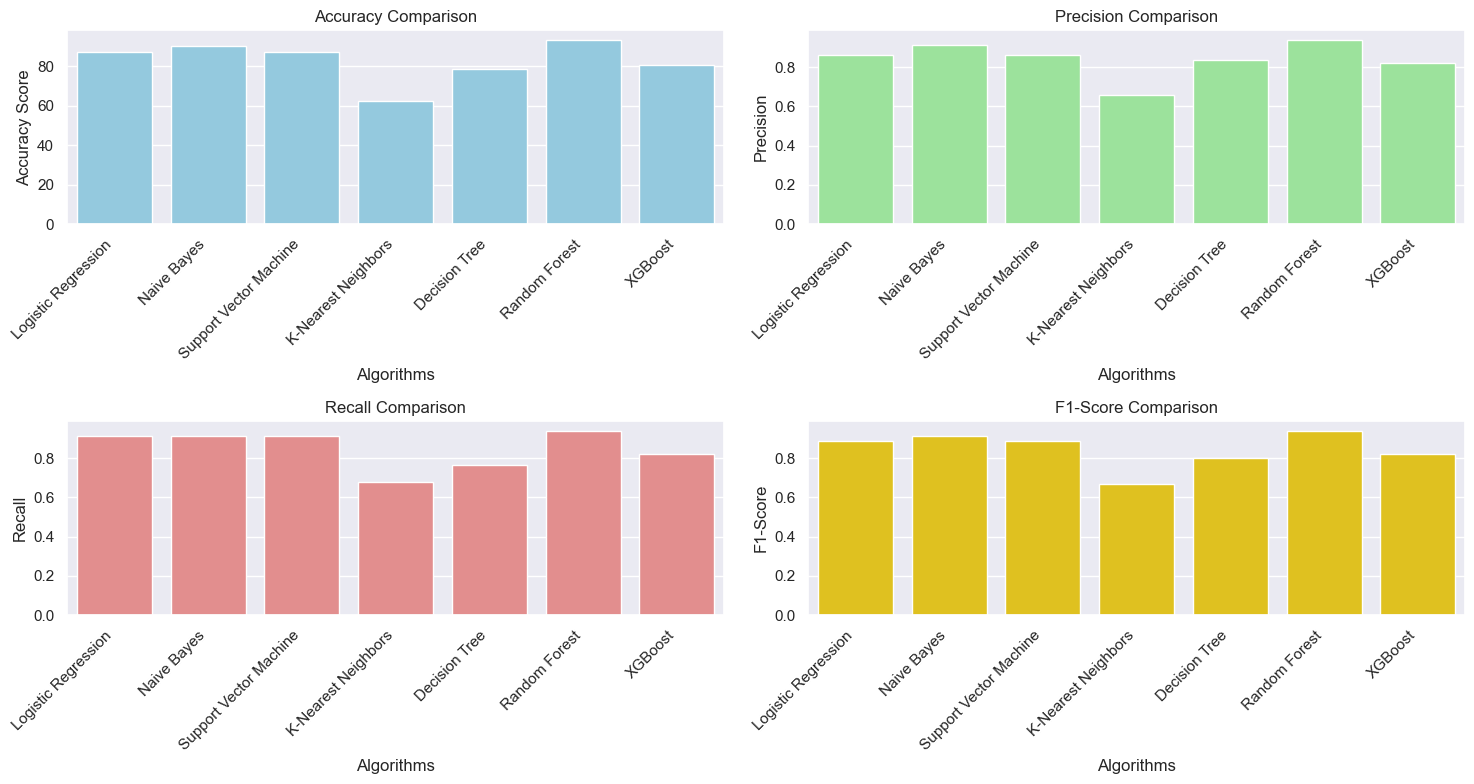

In [187]:
# Create subplots for each metric
plt.figure(figsize=(15, 8))

# Plot bar chart for accuracy
plt.subplot(2, 2, 1)
sns.barplot(x=algorithms, y=scores, color='skyblue')
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Comparison")
plt.xticks(rotation=45, ha="right")

# Plot bar chart for precision
plt.subplot(2, 2, 2)
sns.barplot(x=algorithms, y=precisions, color='lightgreen')
plt.xlabel("Algorithms")
plt.ylabel("Precision")
plt.title("Precision Comparison")
plt.xticks(rotation=45, ha="right")

# Plot bar chart for recall
plt.subplot(2, 2, 3)
sns.barplot(x=algorithms, y=recalls, color='lightcoral')
plt.xlabel("Algorithms")
plt.ylabel("Recall")
plt.title("Recall Comparison")
plt.xticks(rotation=45, ha="right")

# Plot bar chart for F1-Score
plt.subplot(2, 2, 4)
sns.barplot(x=algorithms, y=f1_scores, color='gold')
plt.xlabel("Algorithms")
plt.ylabel("F1-Score")
plt.title("F1-Score Comparison")
plt.xticks(rotation=45, ha="right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

                                                    Fig No. 26

# Visualization of  AUC-ROC Evaluation Metric

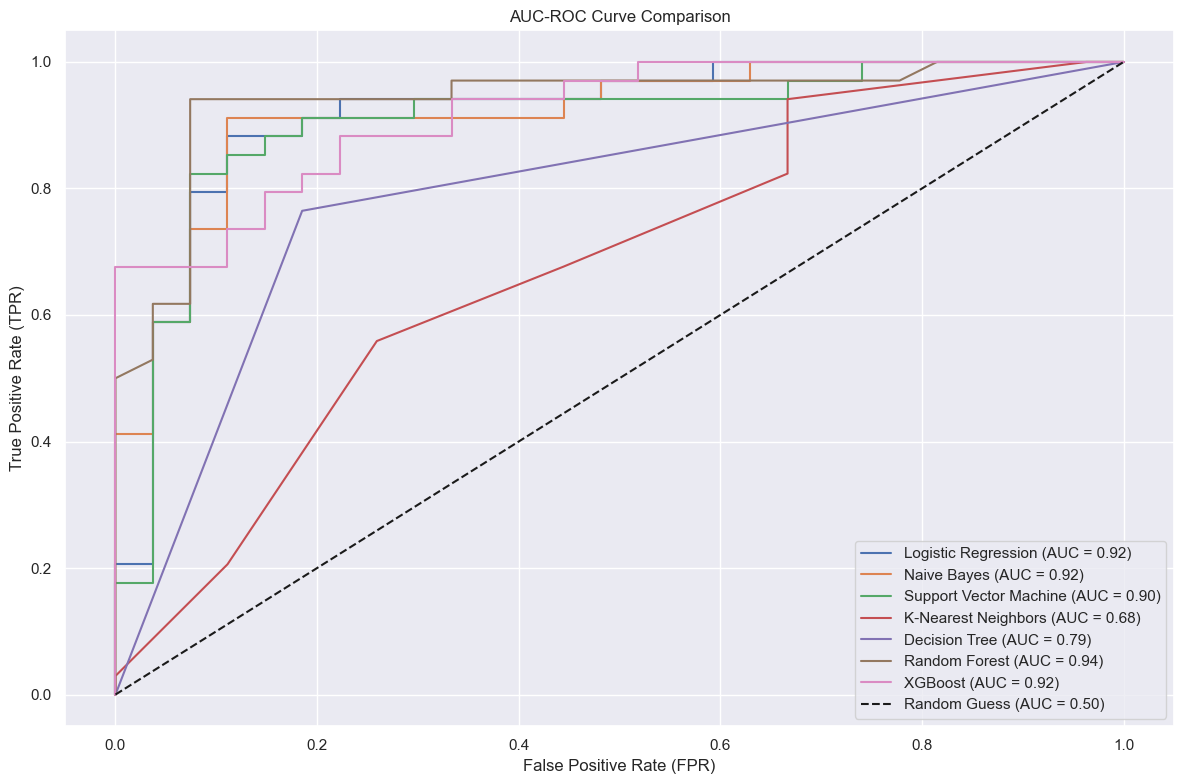

In [184]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Create a new plot for AUC-ROC
plt.figure(figsize=(12, 8))

# Loop through each algorithm and plot its AUC-ROC curve
for i in range(len(algorithms)):
    if algorithms[i] == "Logistic Regression":
        Y_pred_prob = lr.predict_proba(X_test)[:, 1]
    elif algorithms[i] == "Naive Bayes":
        Y_pred_prob = nb.predict_proba(X_test)[:, 1]
    elif algorithms[i] == "Support Vector Machine":
        Y_pred_prob = sv.decision_function(X_test)  # SVM provides decision scores, not probabilities
    elif algorithms[i] == "K-Nearest Neighbors":
        Y_pred_prob = knn.predict_proba(X_test)[:, 1]
    elif algorithms[i] == "Decision Tree":
        Y_pred_prob = dt.predict_proba(X_test)[:, 1]
    elif algorithms[i] == "Random Forest":
        Y_pred_prob = rf.predict_proba(X_test)[:, 1]
    elif algorithms[i] == "XGBoost":
        Y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
    
    # Calculate AUC score
    auc_score = roc_auc_score(Y_test, Y_pred_prob)
    
    # Plot ROC curve for the current model
    plt.plot(fpr, tpr, label=f"{algorithms[i]} (AUC = {auc_score:.2f})")

# Plot diagonal line (chance line)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")

# Add titles and labels
plt.title('AUC-ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")

# Show the plot
plt.tight_layout()
plt.show()


                                                    Fig No. 27

# Visualization of Confusion Matrices 

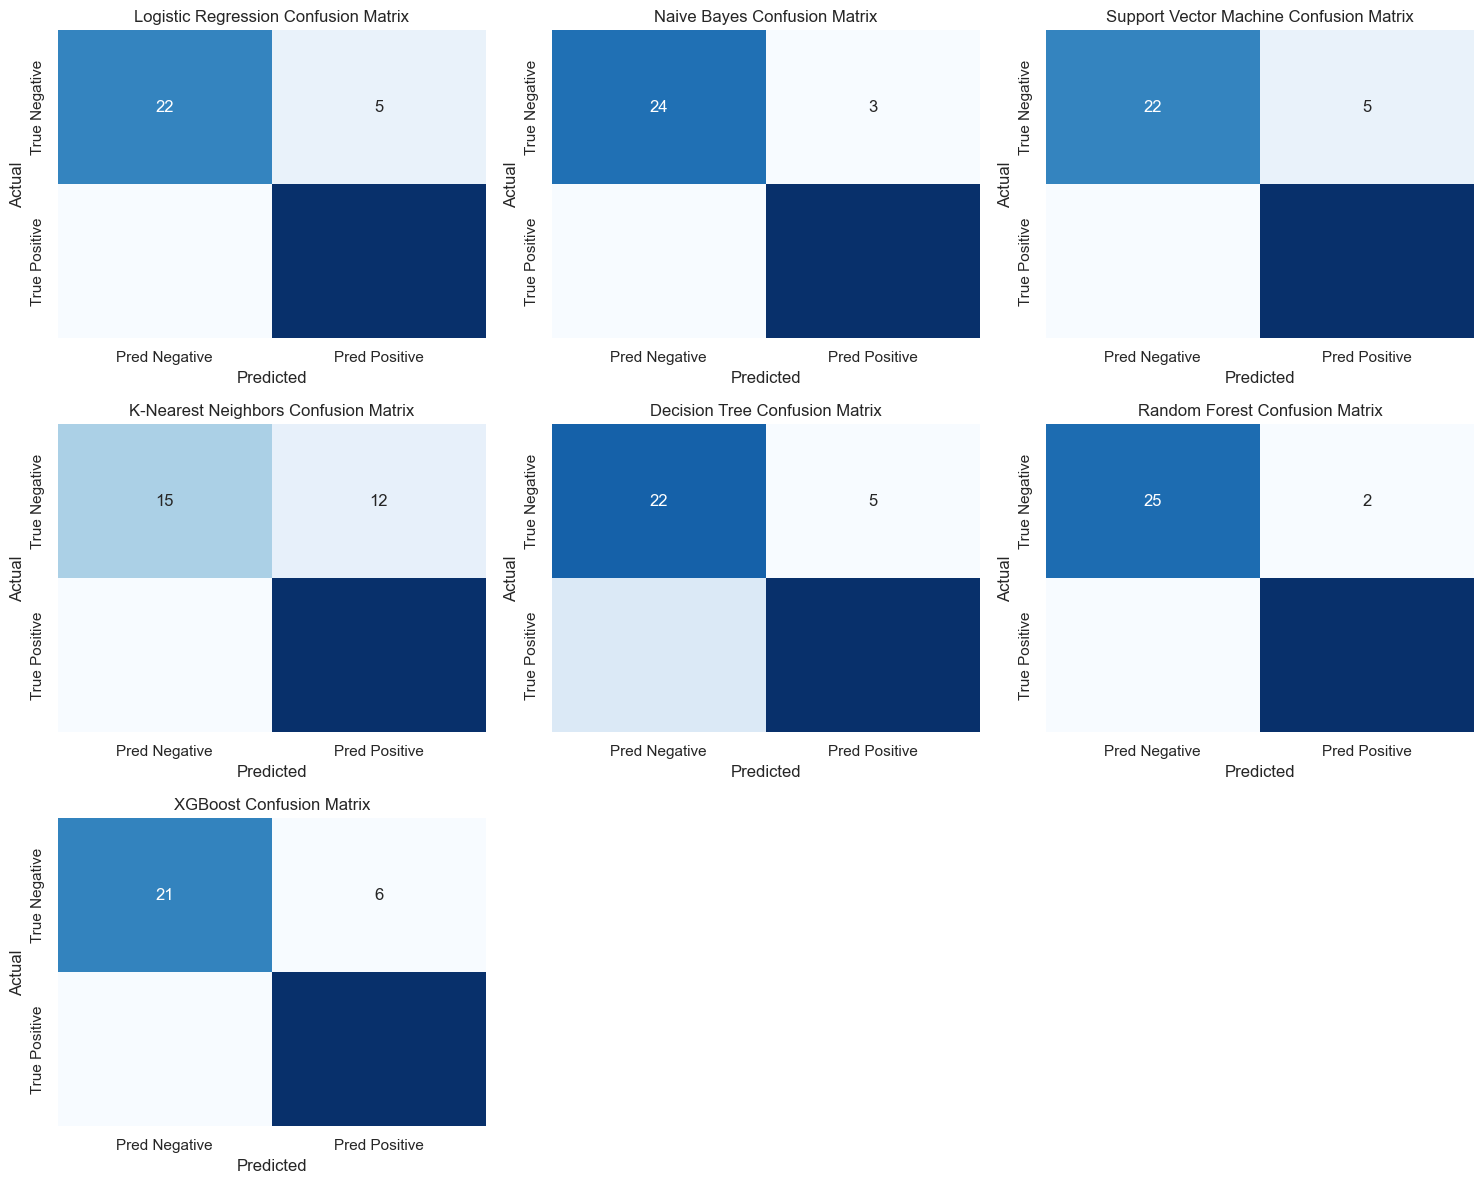

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
conf_matrices = [
    confusion_matrix(Y_test, Y_pred_lr),
    confusion_matrix(Y_test, Y_pred_nb),
    confusion_matrix(Y_test, Y_pred_svm),
    confusion_matrix(Y_test, Y_pred_knn),
    confusion_matrix(Y_test, Y_pred_dt),
    confusion_matrix(Y_test, Y_pred_rf),
    confusion_matrix(Y_test, Y_pred_xgb),
]

# Set up the figure with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3 rows, 3 columns

# Flatten axes to make iteration easier
axes = axes.flatten()

# Loop through each model and plot the confusion matrix on the appropriate subplot
for i in range(len(algorithms)):
    ax = axes[i]  # Get the axis for the current model
    sns.heatmap(conf_matrices[i], annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Pred Negative", "Pred Positive"], 
                yticklabels=["True Negative", "True Positive"], ax=ax)
    ax.set_title(f"{algorithms[i]} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Hide the last subplot if fewer than 9 models
for j in range(len(algorithms), len(axes)):
    axes[j].axis("off")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


                                                    Fig No. 28

## Observation

#### Logistic Regression:

* The logistic regression model performs well, with balanced TN and TP values. However, it still has some false predictions (FP and FN), indicating room for improvement.
* Regularization techniques like L1 or L2 could help in improving its performance by reducing overfitting.

#### Naive Bayes:

* The Naive Bayes model performs exceptionally well, with very few false positives and false negatives.
* Its simplicity and effectiveness make it a strong candidate for this dataset, particularly if the independence assumption holds true.

#### Support Vector Machine (SVM):

* The SVM model performs well, with balanced TN and TP values. However, it still has some false predictions (FP and FN), indicating room for improvement.
* Testing different kernels or adjusting the margin parameter could further optimize its performance.

#### K-Nearest Neighbors (KNN):

* The KNN model struggles with high false positives, leading to more misclassifications in negative cases.
* Feature scaling and experimenting with different values of 'k' can help reduce errors and improve its predictive accuracy.

#### Decision Tree:

* The decision tree model performs well, with balanced TN and TP values. However, it still has some false predictions (FP and FN), indicating room for improvement.
* Implementing pruning or limiting the maximum depth of the tree could enhance its ability to generalize.

#### Random Forest:

* The random forest model demonstrates the best performance, with the lowest false positives and false negatives.
* Increasing the number of trees or fine-tuning hyperparameters like max_features could further boost its classification accuracy.

#### XGBoost:

* The XGBoost model performs reasonably well but has slightly higher false positives and false negatives compared to other top-performing models.
* Advanced hyperparameter tuning, such as adjusting learning rates and max_depth, could significantly improve its classification power.

#### Final thoughts
* Naive Bayes also performs very well, with a similarly low number of misclassifications. Its simplicity and computational efficiency make it a solid choice if interpretability and speed are important.
* SVM, Logistic Regression, and Decision Tree all show moderate performance, with balanced results but slightly more false predictions compared to Random Forest and Naive Bayes.
* KNN struggles the most, with the highest number of false positives, suggesting it is less suited for this dataset.
* XGBoost, though powerful, does not outperform Random Forest in this case and could benefit from further hyperparameter tuning.
* Random Forest is recommended as the primary model for deployment due to its strong performance and reliability.
* If computational resources are limited, Naive Bayes offers a lightweight and effective alternative.
* For further optimization, the dataset can be revisited for feature engineering or resampling to address any potential imbalances.


# Summary of Model Evaluation Metrics

In [186]:
# Store the results in a DataFrame for better readability
metrics_df = pd.DataFrame({
    "Algorithm": algorithms,
    "Accuracy": scores,
    "Precision": precisions,
    "Recall": recalls,
    "F1-Score": f1_scores,
    "AUC-ROC": roc_aucs
})
# Display the DataFrame with all metrics
print("\nModel Comparison Metrics:")
print(metrics_df)
# Plot results
sns.set(rc={'figure.figsize': (15, 8)})




Model Comparison Metrics:
                Algorithm  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0     Logistic Regression     86.89   0.861111  0.911765  0.885714  0.863290
1             Naive Bayes     90.16   0.911765  0.911765  0.911765  0.900327
2  Support Vector Machine     86.89   0.861111  0.911765  0.885714  0.863290
3     K-Nearest Neighbors     62.30   0.657143  0.676471  0.666667  0.616013
4           Decision Tree     78.69   0.838710  0.764706  0.800000  0.789760
5           Random Forest     93.44   0.941176  0.941176  0.941176  0.933551
6                 XGBoost     80.33   0.823529  0.823529  0.823529  0.800654


                                Table No. 13

## Observations

The project aimed to build a robust machine learning model for heart disease prediction, evaluating several algorithms on their ability to predict heart disease based on various features. Below are the key observations drawn from the model evaluation metrics:

#### Best Performing Model:

* Random Forest emerged as the top-performing model with an accuracy of 93.44%, demonstrating excellent performance across all evaluation metrics. Its high precision (0.941), recall (0.941), F1-score (0.941), and AUC-ROC (0.933) indicate that it is highly reliable in identifying both positive and negative heart disease cases.
* The ensemble nature of Random Forest allows it to capture complex patterns in the data, making it highly suited for this classification task.

#### Good Performance of Naive Bayes and Logistic Regression:

* Both Naive Bayes (accuracy = 90.16%) and Logistic Regression (accuracy = 86.89%) performed well, with Naive Bayes slightly outperforming Logistic Regression in precision, recall, and AUC-ROC.
* These models are simpler and still managed to perform well, especially Naive Bayes, which balanced precision and recall perfectly, making it a strong contender for this task.

#### Support Vector Machine (SVM):

* The SVM model (accuracy = 86.89%) showed similar performance to Logistic Regression. While effective in detecting heart disease cases (high recall), it struggled slightly with precision.
* SVM’s linear kernel performed well but didn't outperform Random Forest or Naive Bayes in this case.

#### K-Nearest Neighbors (kNN):

* KNN had the lowest performance with an accuracy of 62.30%, precision of 0.657, and recall of 0.676.
* It struggled with both false positives and false negatives, suggesting that the model’s simplicity and lack of tuning may not have been optimal for the dataset.

#### Decision Tree:

* The Decision Tree model (accuracy = 78.69%) showed decent performance, but it fell behind the more complex models. Its precision and recall values were good, but not as high as those from Random Forest and Naive Bayes.
* This suggests that a more complex or ensemble method like Random Forest could yield better results for heart disease prediction.

#### XGBoost:

* XGBoost (accuracy = 80.33%) performed moderately, with a balanced precision and recall of 0.824. While effective, it did not surpass Random Forest, Naive Bayes, or Logistic Regression in terms of overall performance.
* However, with further hyperparameter tuning, XGBoost could potentially match or even exceed the performance of Random Forest in certain contexts.

#### Final thoughts
* Random Forest is the best model for predicting heart disease in this dataset, showing the power of ensemble methods in capturing complex feature relationships.
* Naive Bayes and Logistic Regression are strong contenders for simpler, more interpretable models, with Naive Bayes performing slightly better in balancing precision and recall.
* SVM, Decision Tree, and XGBoost performed well, but the results showed that ensemble models like Random Forest have a distinct advantage in this case.
* KNN showed the weakest performance, which suggests the need for parameter tuning or an alternative algorithm for this type of problem.

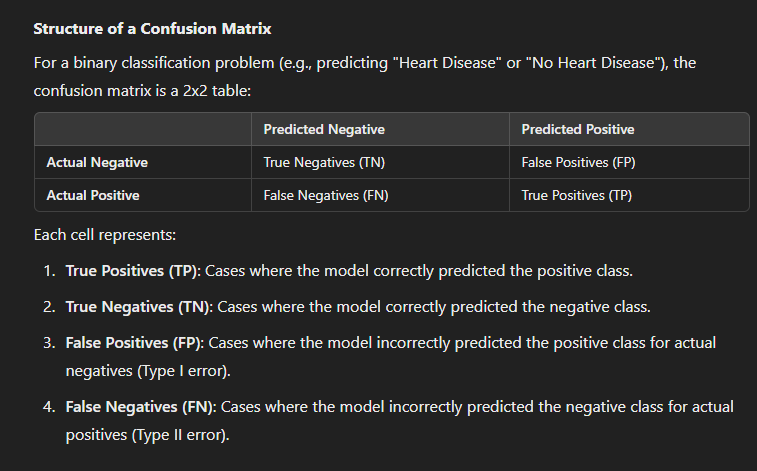
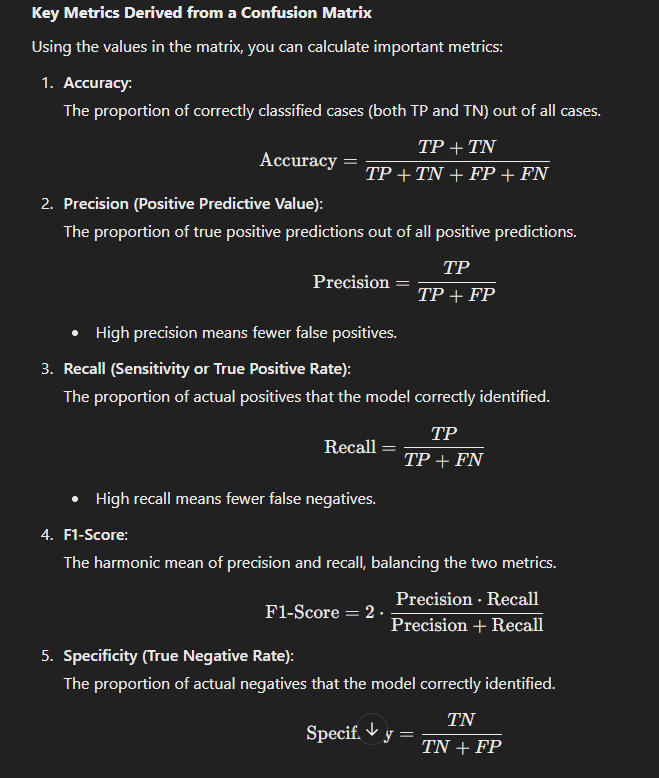
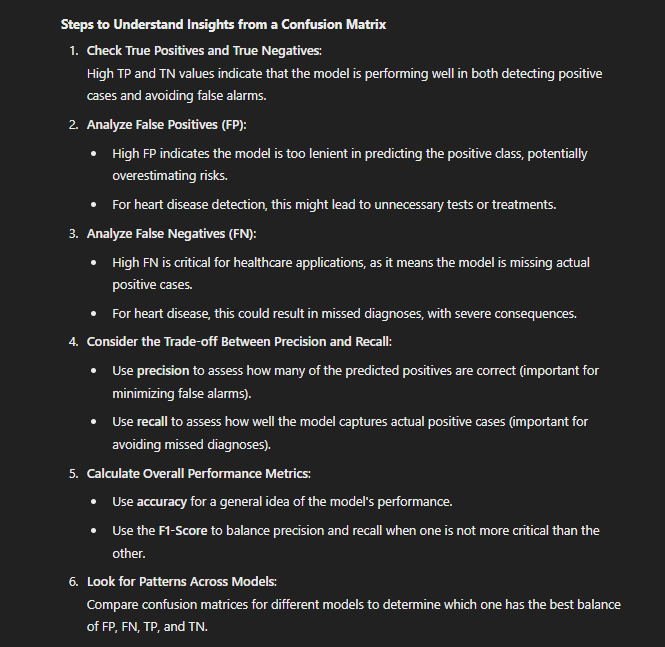
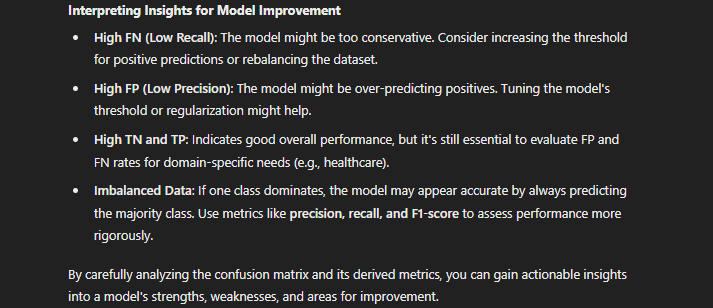

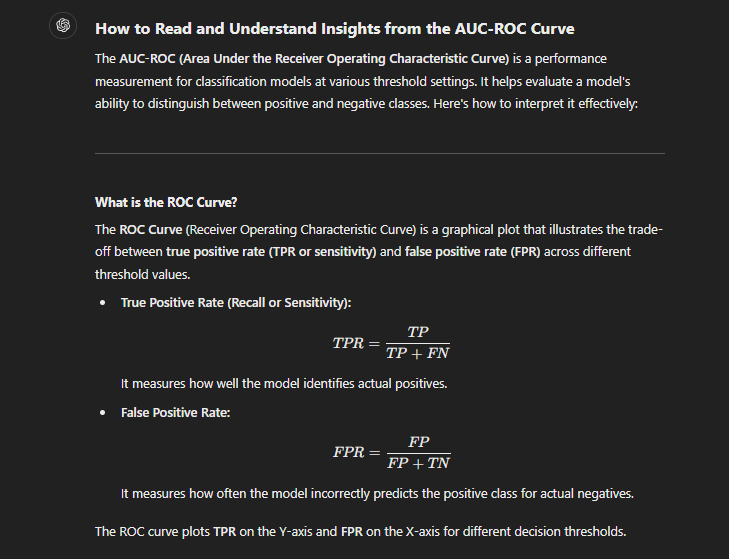
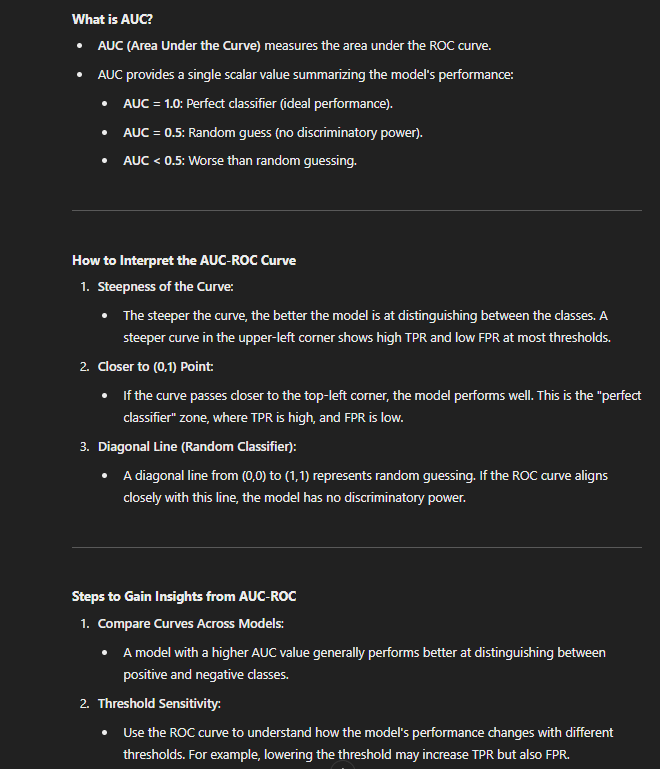
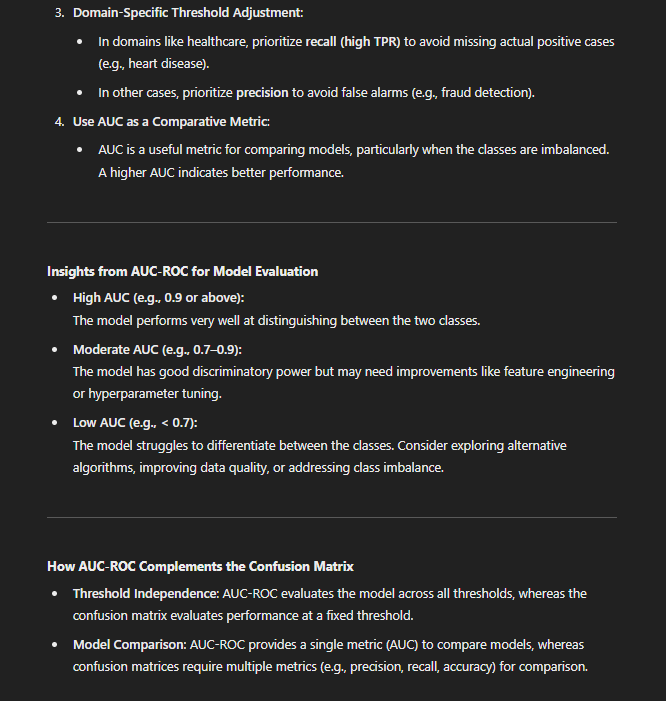
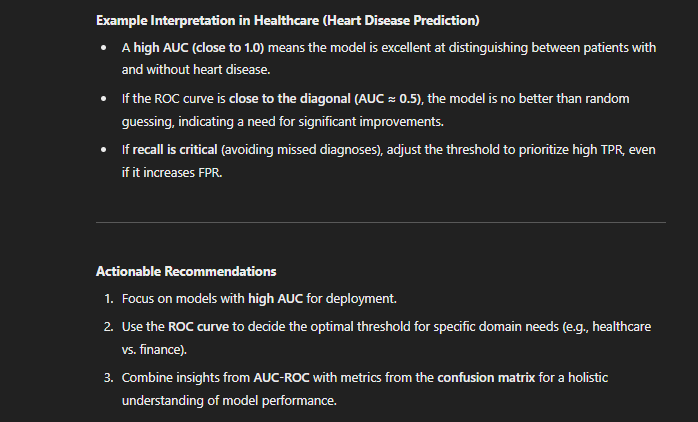